# Stock Price machine Learning

-----------------------------------
## Historical Data Pull for Amazon

In [2]:
import pandas as pd
from alpaca_trade_api.rest import REST, TimeFrame
from fredapi import Fred
import yfinance as yf
import datetime
import pandas_ta as ta

# Keys
ALPACA_API_KEY = ''
ALPACA_API_SECRET = ''
BASE_URL = 'https://api.alpaca.markets'
FRED_API_KEY = ''
STOCK_SYMBOL = 'AMZN'
ADDITIONAL_SYMBOLS = ['AAPL', 'MSFT', 'GOOGL', 'META', 'WMT', 'BABA']

# Initialize the Alpaca and FRED API
api = REST(ALPACA_API_KEY, ALPACA_API_SECRET, BASE_URL)
fred = Fred(api_key=FRED_API_KEY)

# Function to fetch minute-level stock data from Alpaca
def fetch_minute_stock_data(ticker, start_date, end_date):
    all_data = pd.DataFrame()
    while start_date < end_date:
        chunk_end_date = start_date + datetime.timedelta(days=30)
        if chunk_end_date > end_date:
            chunk_end_date = end_date
        print(f'Fetching data from {start_date.strftime("%Y-%m-%d")} to {chunk_end_date.strftime("%Y-%m-%d")}')
        
        data = api.get_bars(
            ticker, 
            TimeFrame.Minute, 
            start=start_date.strftime('%Y-%m-%d'), 
            end=chunk_end_date.strftime('%Y-%m-%d'), 
            adjustment='raw',
            limit= None,
            feed='iex'
        ).df

        all_data = pd.concat([all_data, data])
        start_date = chunk_end_date

    all_data.index = pd.to_datetime(all_data.index)
    return all_data

# Fetch minute-level stock data for the main symbol
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)
merged_df = fetch_minute_stock_data(STOCK_SYMBOL, start_date, end_date)

ValueError: ('Key ID must be given to access Alpaca trade API', ' (env: APCA_API_KEY_ID)')

In [6]:
df=merged_df
df.shape

(98687, 7)

-----------------------------------
### Adjusted Close Plot for Visual

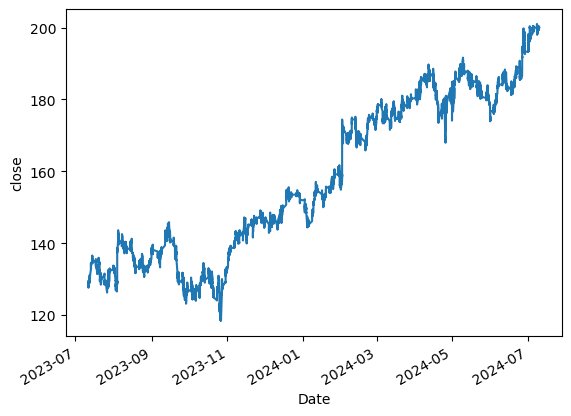

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

df['close'].plot()
plt.xlabel('Date')
plt.ylabel('close')
plt.show()

-----------------------------------
## Technical Indicator Calculations

In [ ]:
df.ta.indicators()

In [7]:
# Calculate Moving Averages
df.ta.sma(length=10, append=True)
df.ta.sma(length=2, append=True)
df.ta.sma(length=5, append=True)
df.ta.sma(length=7, append=True)
df.ta.sma(length=14, append=True)
df.ta.sma(length=30, append=True)
df.ta.sma(length=50, append=True)
df.ta.sma(length=200, append=True)

# Calculate Bollinger Bands
df.ta.bbands(length=20, append=True) #volatility

# Calculate RSI
df.ta.rsi(length=14, append=True)

# Calculate MACD 
df.ta.macd(fast=12, slow=26, append=True)

print(df)

                             close     high      low  trade_count     open  \
timestamp                                                                    
2023-07-11 13:30:00+00:00  127.695  128.015  127.580           88  127.715   
2023-07-11 13:31:00+00:00  127.630  127.630  127.440           54  127.600   
2023-07-11 13:32:00+00:00  127.595  127.720  127.485           74  127.650   
2023-07-11 13:33:00+00:00  127.700  127.720  127.570           70  127.620   
2023-07-11 13:34:00+00:00  128.080  128.150  127.700           36  127.700   
...                            ...      ...      ...          ...      ...   
2024-07-09 19:56:00+00:00  199.400  199.410  199.290           48  199.310   
2024-07-09 19:57:00+00:00  199.410  199.430  199.335           40  199.335   
2024-07-09 19:58:00+00:00  199.405  199.450  199.400           77  199.445   
2024-07-09 19:59:00+00:00  199.340  199.440  199.310           96  199.365   
2024-07-10 12:31:00+00:00  199.980  199.980  199.980            

### Good Data Pull so far with calculations 
More Technical Indicators can be added as we go. Now for some plotting to get some visuals of what the data looks like.

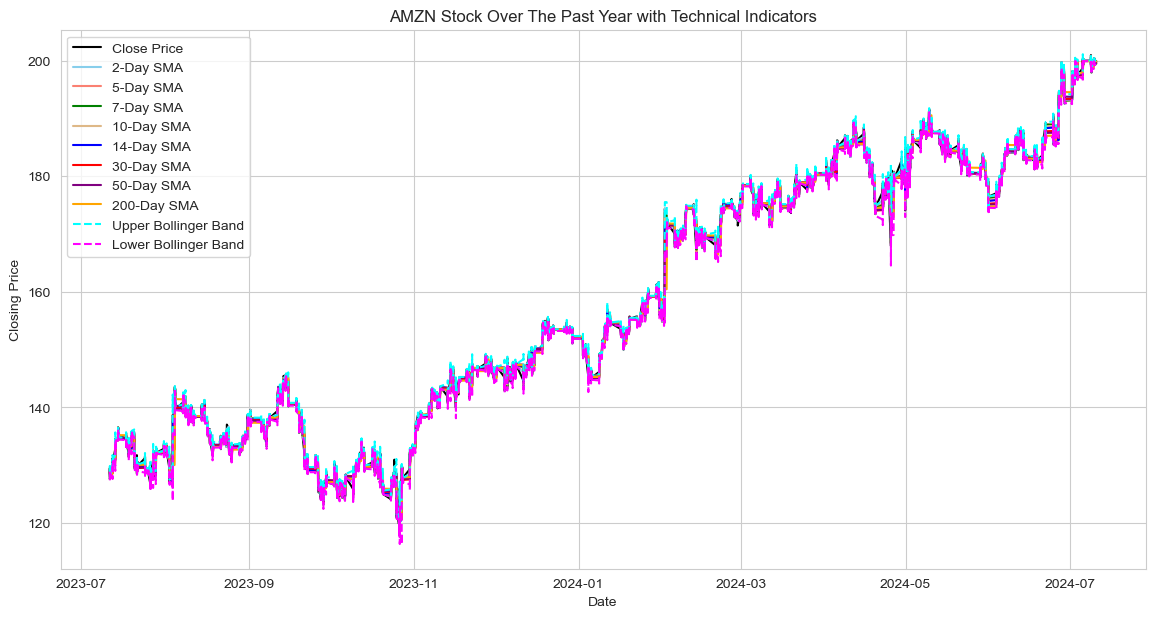

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize =(14,7))
# Moving Aveerages
plt.plot(df.index, df['close'], label = 'Close Price', color = 'black')
plt.plot(df.index,df['SMA_2'],label = '2-Day SMA', color = 'skyblue')
plt.plot(df.index,df['SMA_5'],label = '5-Day SMA', color = 'salmon')
plt.plot(df.index,df['SMA_7'],label = '7-Day SMA', color = 'green')
plt.plot(df.index,df['SMA_10'],label = '10-Day SMA', color = 'burlywood')
plt.plot(df.index, df['SMA_14'],label = '14-Day SMA',color = 'blue')
plt.plot(df.index, df['SMA_30'],label = '30-Day SMA', color = 'red')
plt.plot(df.index,df['SMA_50'], label = '50-Day SMA',color = 'purple')
plt.plot(df.index, df['SMA_200'], label = '200-Day SMA',color = 'orange')
# Bollinger Bands
plt.plot(df.index,df['BBU_20_2.0'],label = 'Upper Bollinger Band',color = 'cyan',linestyle = '--')
plt.plot(df.index,df['BBL_20_2.0'],label = 'Lower Bollinger Band',color = 'magenta',linestyle = '--')

plt.title('AMZN Stock Over The Past Year with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Adding some more technical indicators

Pandas ta package not working synergistically with inputted close column for the dataframe.
Custom function below drawn from pandas_ta fixes the issue. 

#### Adding in the indicators

In [ ]:
# Full technical indicators minus other previous additions
df.ta.aberration(append=True)     # Aberration: Measures volatility
df.ta.above(above_value=160, append=True)  # Check if value is above 100
df.ta.accbands(append=True)      # Accumulation/Distribution Bands: Measure volatility
df.ta.ad(append=True)            # Accumulation/Distribution: Volume indicator
df.ta.adosc(append=True)         # Accumulation/Distribution Oscillator: Volume indicator
df.ta.adx(append=True)           # Average Directional Index: Measures trend strength
df.ta.alma(append=True)          # Arnaud Legoux Moving Average: Smoothed price data
df.ta.amat(append=True)          # Adaptative Moving Average Trend: Identifies trends
df.ta.ao(append=True)            # Awesome Oscillator: Measures momentum
df.ta.aobv(append=True)          # Above On Balance Volume: Volume indicator
df.ta.apo(append=True)           # Absolute Price Oscillator: Measures momentum
df.ta.aroon(append=True)         # Aroon: Identifies trend changes
df.ta.atr(append=True)           # Average True Range: Measures volatility
df.ta.below(below_value=50, append=True)  # Check if value is below 50
df.ta.bias(append=True)          # Bias: Measures deviation from a specified average
df.ta.bop(append=True)           # Balance of Power: Momentum indicator
df.ta.brar(append=True)          # (Bullish/Bearish) Rectangular Area: Momentum indicator
df.ta.cci(append=True)           # Commodity Channel Index: Identifies overbought/oversold conditions
df.ta.cfo(append=True)           # Chande Forecast Oscillator: Momentum indicator
df.ta.cg(append=True)            # Center of Gravity: Identifies turning points
df.ta.cmo(append=True)           # Chande Momentum Oscillator: Measures momentum
df.ta.coppock(append=True)       # Coppock Curve: Long-term momentum indicator
df.ta.cti(append=True)           # Closing Tick Indicator: Momentum indicator
df.ta.dm(append=True)           # Directional Movement: Measures trend direction
df.ta.er(append=True)           # Efficiency Ratio: Measures trend strength
df.ta.eri(append=True)          # Elder Ray Index: Combines bull and bear power
df.ta.fisher(append=True)       # Fisher Transform: Converts prices into a Gaussian normal distribution
df.ta.inertia(append=True)      # Inertia: Measures rate of change and direction
df.ta.kdj(append=True)          # Stochastic Oscillator: Measures momentum
df.ta.kst(append=True)          # Know Sure Thing (KST): Smoothed rate of change
df.ta.mom(append=True)          # Momentum: Measures rate of change in prices
df.ta.pgo(append=True)          # Percentage Price Oscillator: Measures momentum
df.ta.ppo(append=True)          # Price Percentage Oscillator: Measures momentum
df.ta.psl(append=True)          # Polarized Fractal Efficiency: Detects trends
df.ta.pvo(append=True)          # Percentage Volume Oscillator: Measures volume momentum
df.ta.qqe(append=True)          # Quantitative Qualitative Estimation: Identifies trends
df.ta.roc(append=True)          # Rate of Change: Measures momentum
df.ta.rsx(append=True)          # Relative Strength Index Smoothed: Smoothed RSI
df.ta.rvgi(append=True)          # Relative Vigor Index (RVI): Measures momentum
df.ta.slope(append=True)         # Slope: Measures the rate of change of a series
df.ta.smi(append=True)           # Stochastic Momentum Index (SMI): Measures momentum
df.ta.squeeze(append=True)       # Squeeze Momentum Indicator: Detects periods of low volatility
df.ta.squeeze_pro(append=True)   # Squeeze Pro: Enhanced version of Squeeze Momentum Indicator
df.ta.stc(append=True)           # Schaff Trend Cycle Indicator: Identifies market trends      
df.ta.stochrsi(append=True)      # Stochastic RSI: Combination of Stochastic Oscillator and RSI
df.ta.td_seq(append=True)        # TD Sequential: Detects trend exhaustion
df.ta.trix(append=True)          # Triple Exponential Average: Smoothed moving average
df.ta.tsi(append=True)           # True Strength Index: Measures trend direction
df.ta.uo(append=True)            # Ultimate Oscillator: Measures buying and selling pressure
df.ta.willr(append=True)        # Williams %R: Identifies overbought or oversold conditions
df.ta.dema(append=True)         # Double Exponential Moving Average (DEMA): Smoother average with emphasis on recent prices
df.ta.ema(append=True)          # Exponential Moving Average (EMA): Responsive to recent price changes
df.ta.fwma(append=True)         # Fixed Weighted Moving Average (FWMA): Evenly weighted moving average
df.ta.hilo(append=True)         # Highest High and Lowest Low (HILO): Identifies highest high and lowest low
df.ta.hl2(append=True)          # High-Low Midpoint (HL2): Midpoint between high and low prices
df.ta.hlc3(append=True)         # High-Low-Close Average (HLC3): Average of high, low, and close prices
df.ta.hma(append=True)          # Hull Moving Average (HMA): Reduced lag moving average
df.ta.hwma(append=True)         # Heikin Ashi Weighted Moving Average (HWMA): Smoothed moving average using Heikin Ashi candles
df.ta.ichimoku(append=True)     # Ichimoku Cloud: Trend-following indicator showing support, resistance, momentum, and trend direction
df.ta.jma(append=True)          # Jurik Moving Average (JMA): Dynamically smoothed moving average
df.ta.kama(append=True)         # Kaufman Adaptive Moving Average (KAMA): Adjusts sensitivity to market volatility
df.ta.linreg(append=True)       # Linear Regression: Fits a linear regression line to price data
df.ta.midpoint(append=True)     # Midpoint Price: Calculates the midpoint of high and low prices
df.ta.ohlc4(append=True)        # OHLC4 Average: Calculates the average of open, high, low, and close prices
df.ta.pwma(append=True)         # Volume Weighted Moving Average (PWMA): Moving average weighted by volume
df.ta.sinwma(append=True)       # Sine Weighted Moving Average (SINWMA): Moving average with sine weighting
df.ta.ssf(append=True)          # Sine Smoothed Filter (SSF): Smoothed version of the sine wave
df.ta.supertrend(append=True)   # Supertrend: Trend following indicator based on volatility
df.ta.t3(append=True)           # T3 Moving Average: Adaptive moving average
df.ta.tema(append=True)         # Triple Exponential Moving Average (TEMA): Smoother and more responsive moving average
df.ta.trima(append=True)        # Triangular Moving Average (TRIMA): Smoother moving average
df.ta.vidya(append=True)        # VIDYA (Variable Index Dynamic Average): Adjusts average based on market volatility
df.ta.vwap(append=True)         # Volume Weighted Average Price (VWAP): Average price weighted by volume
df.ta.vwma(append=True)         # Volume Weighted Moving Average (VWMA): Moving average weighted by volume
df.ta.wcp(append=True)          # Weighted Close Price (WCP): Weighted average of high, low, and close prices
df.ta.zlma(append=True)         # Zero Lag Moving Average (ZLMA): Moving average with reduced lag
df.ta.log_return(append=True)   # Logarithmic return of the series
df.ta.percent_return(append=True)  # Percentage return of the series
df.ta.entropy(append=True)      # Shannon entropy of the series
df.ta.kurtosis(append=True)     # Kurtosis of the series
df.ta.mad(append=True)          # Mean absolute deviation of the series
df.ta.median(append=True)       # Median of the series
df.ta.quantile(append=True)     # Quantile (percentile) of the series
df.ta.skew(append=True)         # Skewness of the series
df.ta.stdev(append=True)        # Standard deviation of the series
df.ta.tos_stdevall(append=True)  # Standard deviation of the total return series
df.ta.variance(append=True)     # Variance of the series
df.ta.zscore(append=True)       # Z-score of the series
df.ta.adx(append=True)          # Average Directional Movement Index (ADX): Measures trend strength
df.ta.amat(append=True)         # Adaptive Moving Average (AMAT): Adjusts to market conditions
df.ta.aroon(append=True)        # Aroon Oscillator: Identifies trend changes and strength
df.ta.chop(append=True)         # Choppiness Index (CHOP): Measures market trendiness
df.ta.cksp(append=True)         # Chande Kroll Stop (CKSP): Provides stop levels for trading
df.ta.decay(append=True)        # Linear decay of the series: Weighted average over time
df.ta.decreasing(append=True)   # Boolean indicating if series is decreasing
df.ta.dpo(append=True)          # Detrended Price Oscillator (DPO): Identifies cycles
df.ta.increasing(append=True)   # Boolean indicating if series is increasing
df.ta.long_run(append=True)     # Long Run Momentum (LRM): Long-term trend strength
df.ta.psar(append=True)         # Parabolic Stop and Reverse (PSAR): Provides stop levels
df.ta.qstick(append=True)       # QStick: Measures candlestick momentum
df.ta.short_run(append=True)    # Short Run Momentum (SRM): Short-term trend strength
df.ta.tsignals(append=True)     # Trending Signals (TSIGNALS): Identifies trend direction
df.ta.ttm_trend(append=True)    # TTM Trend: Indicates trend direction based on volatility
df.ta.vhf(append=True)          # Vertical Horizontal Filter (VHF): Measures market trendiness
df.ta.vortex(append=True)       # Vortex Indicator: Identifies trend changes
df.ta.xsignals(append=True)     # Cross Signals (XSIGNALS): Identifies cross points
df.ta.donchian(append=True)    # Donchian Channels: Identifies potential support and resistance levels
df.ta.hwc(append=True)         # Hull Moving Average (HWC): Fast and responsive moving average
df.ta.kc(append=True)          # Keltner Channels (KC): Similar to Bollinger Bands, uses average true range
df.ta.massi(append=True)       # Mass Index (MASSI): Identifies reversals based on range expansion
df.ta.natr(append=True)        # Normalized Average True Range (NATR): Normalizes ATR for comparison
df.ta.pdist(append=True)       # Price Distribution: Histogram of closing prices
df.ta.rvi(append=True)         # Relative Volatility Index (RVI): Measures volatility
df.ta.thermo(append=True)      # Thermometer: Measures the speed and direction of price movements
df.ta.true_range(append=True)  # True Range: Measures volatility and price movement
df.ta.ui(append=True)          # Ulcer Index (UI): Measures downside volatility

In [10]:
df.shape

(98687, 207)

## Other stock and external index data pull

In [ ]:
# Function to fetch company financials from Yahoo Finance
def fetch_company_financials(symbol):
    ticker = yf.Ticker(symbol)
    financials = ticker.financials
    balance_sheet = ticker.balance_sheet
    cashflow = ticker.cashflow
    return financials, balance_sheet, cashflow

# Fetch company financials for the main symbol
financials, balance_sheet, cashflow = fetch_company_financials(STOCK_SYMBOL)

# Extract relevant financial data for the main symbol
revenue = financials.loc['Total Revenue'].values[0]
net_income = financials.loc['Net Income'].values[0]
gross_profit = financials.loc['Gross Profit'].values[0]
total_debt = balance_sheet.loc['Total Liabilities Net Minority Interest'].values[0]
operating_cash_flow = cashflow.loc['Operating Cash Flow'].values[0]

# Add financial data for the main symbol to the merged dataframe
merged_df['Revenue'] = revenue
merged_df['Net_Income'] = net_income
merged_df['Gross_Profit'] = gross_profit
merged_df['Total_Debt'] = total_debt
merged_df['Operating_Cash_Flow'] = operating_cash_flow

# Function to download and process additional stock data from Yahoo Finance
def download_and_process_data(symbol, start_date, end_date, interval='1m'):
    df = api.get_bars(
        symbol, 
        TimeFrame.Minute, 
        start=start_date.strftime('%Y-%m-%d'), 
        end=end_date.strftime('%Y-%m-%d'),
        adjustment='raw',
        limit= None,
        feed='iex'
    ).df
    if not df.empty:
        df = df[['close']].rename(columns={'close': symbol})
        return df
    else:
        print(f"Failed to fetch data or no data available for {symbol}")
        return None

# Fetch and append close prices for additional symbols
additional_close_dfs = []
for symbol in ADDITIONAL_SYMBOLS:
    additional_data = download_and_process_data(symbol, start_date, end_date, interval='1m')
    if additional_data is not None:
        additional_close_dfs.append(additional_data)

# Merge additional close prices into the main dataframe
if additional_close_dfs:
    for df in additional_close_dfs:
        merged_df = pd.merge(merged_df, df, left_index=True, right_index=True, how='outer')

# Display the merged DataFrame
print(merged_df)

# Save to CSV if needed
merged_df.to_csv(f'{STOCK_SYMBOL}_minute_data_with_financials_and_closes.csv')

In [12]:
merged_df.shape

(101871, 218)

## Data Cleaning

In [1]:
from IPython.display import display, HTML


def dataframe_to_html(df):
    """
    Convert a DataFrame to an HTML table.

    Parameters:
    df (pd.DataFrame): The DataFrame to convert.

    Returns:
    str: The HTML representation of the DataFrame.
    """
    # Convert the DataFrame to an HTML table
    html = df.to_html()
    
    # Return the HTML string
    return html



def htmldf(df):
    """
    Display a DataFrame as an HTML table in a Jupyter notebook.

    Parameters:
    df (pd.DataFrame): The DataFrame to display.
    """
    # Convert the DataFrame to an HTML table
    html = dataframe_to_html(df)
    
    # Display the HTML table
    display(HTML(html))



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import pandas as pd
import numpy as np

df_new=pd.read_csv('AMZN_minute_data_with_financials_and_closes.csv')


-----------------------------
### Data types of all columns

In [3]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])
df_new.set_index('timestamp', inplace=True) 
dtypes_df = df_new.dtypes.to_frame(name='Data Type')
htmldf(dtypes_df)

In [4]:
# Top 5 viewable rows for each column
htmldf(df_new.head())

--------------------
#### Given that none of the columns are categorical columns, there will not be any frequency distrubutions for variables.

----------------
### Getting Descriptions and summary statistics of all columns of all the columns

In [5]:
htmldf(df_new.describe())

--------------------------
Because there are missing values up to row 200 for some columns and missing information in between some rows because of weekends and other missing data we drop the rows where NA for the closing price and use backfill for the earlier rows and forward fill for the rows in between.

In [6]:
df_new.isna().sum().sum()

1332104

In [7]:
# Dropping weekends and aftermarket data for amazon closing price.
df_new.dropna(subset=['close'])

# Backfill for rows up to 200
df_new.loc[df_new.index <= df_new.index[200]] = df_new.loc[df_new.index <= df_new.index[200]].bfill()

# Forward fill from rows 200 onwards
df_new.loc[df_new.index > df_new.index[200]] = df_new.loc[df_new.index > df_new.index[200]].ffill()

# Calculate the sum of NaN values for each column
na_counts = df_new.isna().sum()

# Filter columns where the sum of NaN values is not zero
columns_with_nans = na_counts[na_counts != 0].index.tolist()

print('NaN Columns:')
print(columns_with_nans)

NaN Columns:
['QQEs_14_5_4.236', 'TD_SEQ_UP', 'TD_SEQ_DN', 'HILOs_13_21', 'SUPERTs_7_3.0', 'PSARs_0.02_0.2', 'META']


------------------------------------
##### Regression for close of Amazon on columns with missing values still in dataset.

In [8]:
import statsmodels.api as sm

# Identify columns with missing values
columns_with_nans = df_new.columns[df_new.isna().any()].tolist()

# Perform linear regression for each column with missing values against 'close'
for col in columns_with_nans:
    
    data = df_new[[col, 'close']].dropna()

    
    if data.empty:
        print(f"No valid data for regression with column {col}")
        continue
    
    X = data[col]  
    y = data['close']  

    X = sm.add_constant(X)  # Add a constant term to the model
    model = sm.OLS(y, X).fit()  
    
    
    print(f"Regression results for {col}:")
    print(model.summary())
    print("\n")


Regression results for QQEs_14_5_4.236:
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.662
Date:                Sun, 21 Jul 2024   Prob (F-statistic):              0.103
Time:                        22:07:51   Log-Likelihood:            -4.6043e+05
No. Observations:              101846   AIC:                         9.209e+05
Df Residuals:                  101844   BIC:                         9.209e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

##### Analysis of p-values:

Above, we can see that the p-values indicate a significant impact on the closing price of Amazon, except for QQEs.

##### Variable Retention:

We are retaining this variable for now until further analysis to determine if there's any real multicollinearity or if it has interaction effects with other variables.

##### Dropping Columns with No Data:

Below, the two columns with no data are being dropped.


In [9]:
# Dropping columns with all rows missing
df_new.drop(columns=['TD_SEQ_DN','TD_SEQ_UP'],inplace=True)

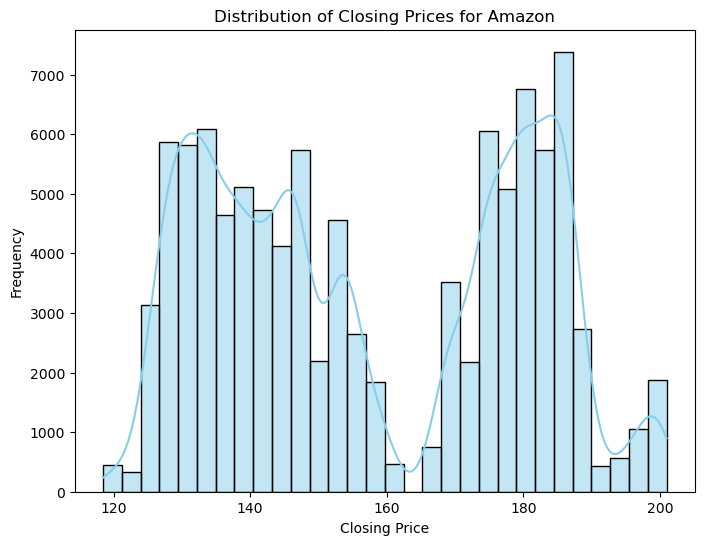

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df_new['close'],bins = 30,kde=True,color='skyblue',edgecolor='black')
plt.title('Distribution of Closing Prices for Amazon')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

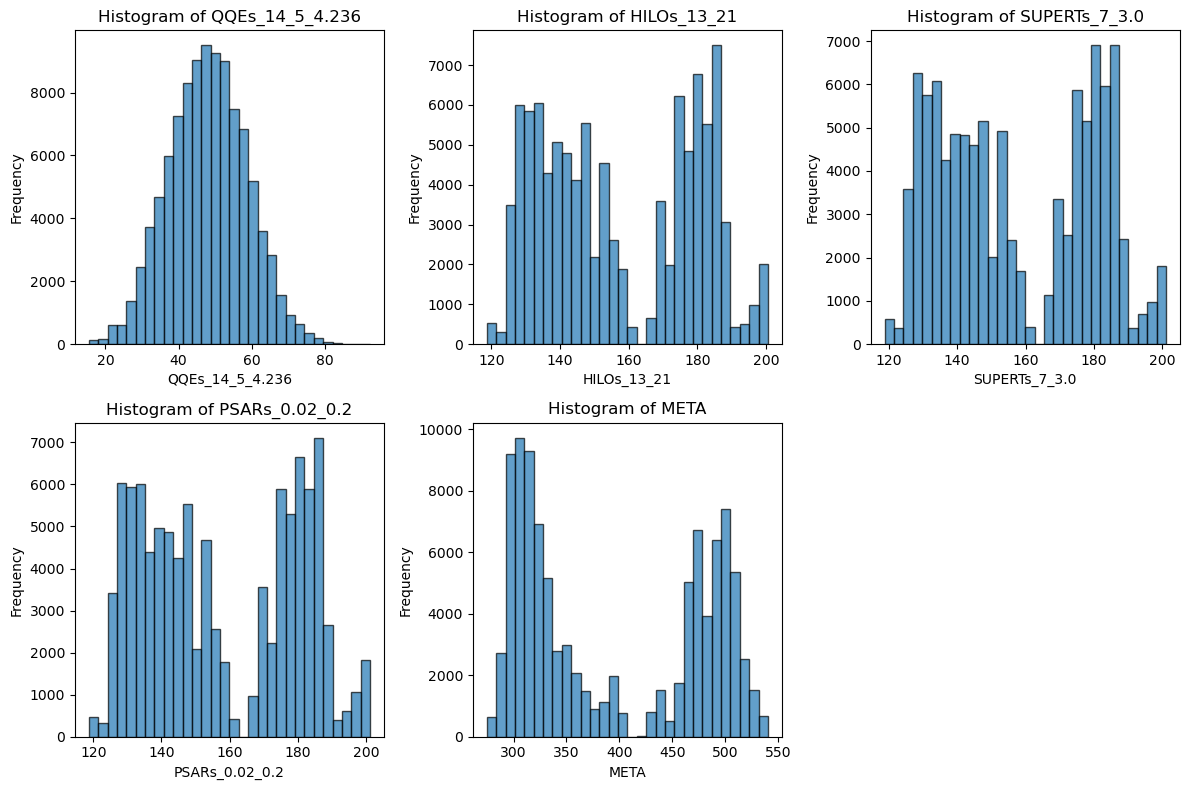

In [11]:
# Columns with nan values
columns_with_nan = ['QQEs_14_5_4.236', 'HILOs_13_21', 'SUPERTs_7_3.0', 'PSARs_0.02_0.2','META']

# Plot histograms for each column
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_with_nan, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_new[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

----------------------------------------

##### Imputation Strategy for QQE Column:

Since the QQE column follows a normal distribution, we will impute missing values using the mean value of the column.

##### KS Test for Distribution Validation:

For the other 3 columns, we will perform a Kolmogorov-Smirnov (KS) test to validate that they follow the same distribution as the target close value of Amazon.


In [12]:
from scipy.stats import ks_2samp
# Filling QQE
QQE_mean = df_new['QQEs_14_5_4.236'].mean()
df_new['QQEs_14_5_4.236'].fillna(QQE_mean,inplace=True)

# Performing the KS test on the other variables
columns_to_test = [ 'HILOs_13_21', 'SUPERTs_7_3.0', 'PSARs_0.02_0.2','META']

for column in columns_to_test:
    target = df_new['close']
    test_col = column

    ks_statistic,p_value = ks_2samp(target,test_col)

    # Interpretation
    sig = 0.05
    if p_value < sig:
        print(f"The distributions are likely different (reject null hypothesis). KS statistic: {ks_statistic}, p-value: {p_value}")
    else:
        print(f"The distributions are likely similar (fail to reject null hypothesis). KS statistic: {ks_statistic}, p-value: {p_value}")


/var/folders/4r/7dgkc7nx5hs82x6_2yn0d3qc0000gn/T/ipykernel_43797/3010991831.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['QQEs_14_5_4.236'].fillna(QQE_mean,inplace=True)


The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0
The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0
The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0
The distributions are likely different (reject null hypothesis). KS statistic: 1.0, p-value: 0.0


-------------------
##### It doesn't seem like they follow the same distribution so, for simplicity we can impute using the median for these columns.

In [13]:
# Calculate medians for each column in columns_to_test
median_vals = df_new[columns_to_test].median()

# Impute missing values using medians
df_new[columns_to_test] = df_new[columns_to_test].fillna(median_vals)

df_new.isna().sum().sum()

0

-----------------------------
##### No missing values remaining

---------------------
### Handling and detecting outliers

To handle any extreme points and outliers, we are choosing to go with a windsorized approach so as to not remove upper and lower values that can be important within the data. We will pull out those in the bottom and top 1%

In [14]:
# Function to apply Windsorization
def windsorize(data, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(data, lower_percentile)
    upper_bound = np.percentile(data, upper_percentile)
    return np.clip(data, lower_bound, upper_bound)

# Apply Windsorization to all numeric columns
df_new = df_new.copy()
for col in df_new.select_dtypes(include=[np.number]).columns:
    df_new[col] = windsorize(df_new[col])

df_new.shape



(101871, 216)

----------------------------------
### Looking at how well each moving average handles noise.

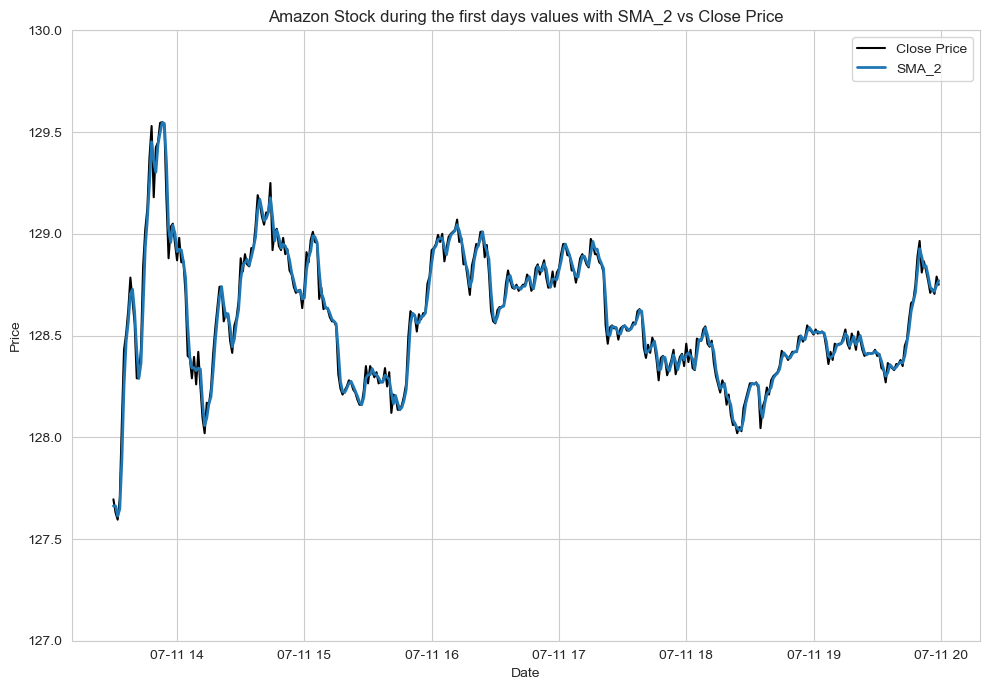

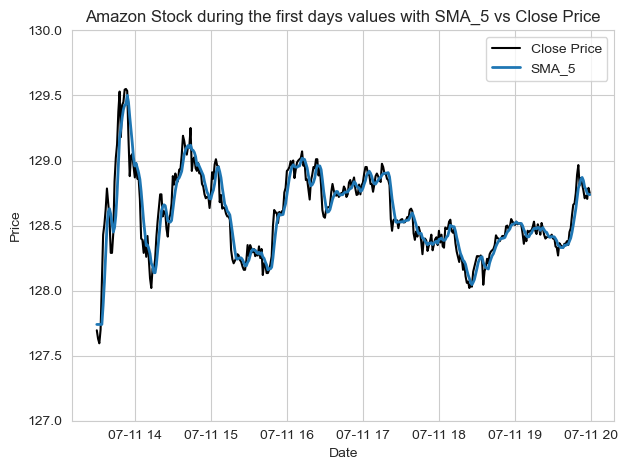

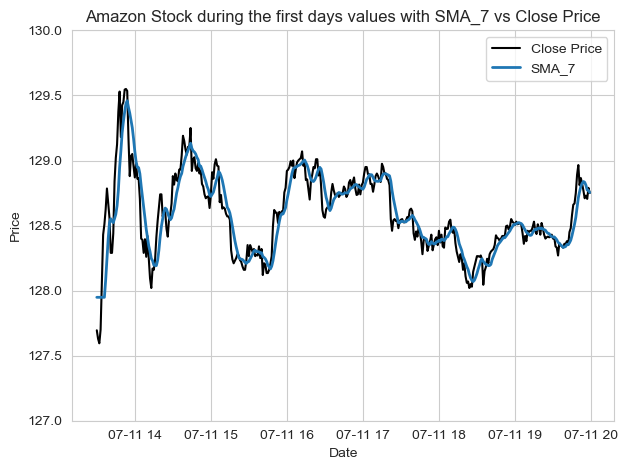

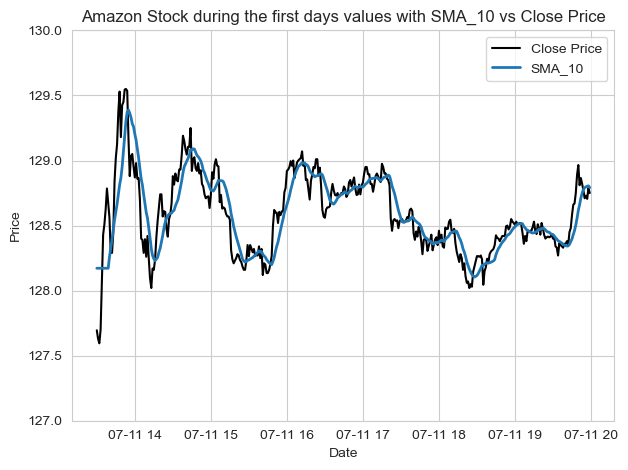

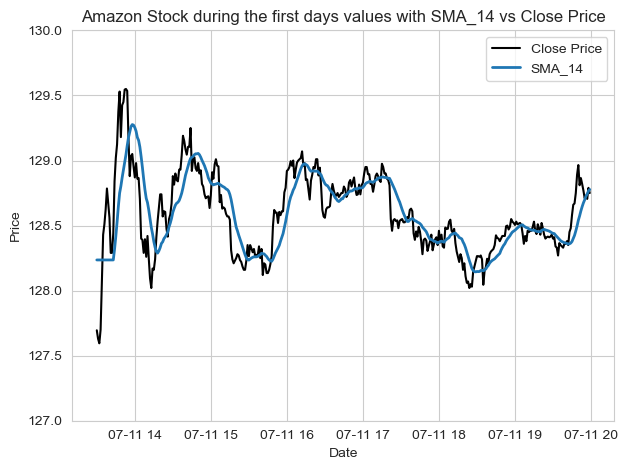

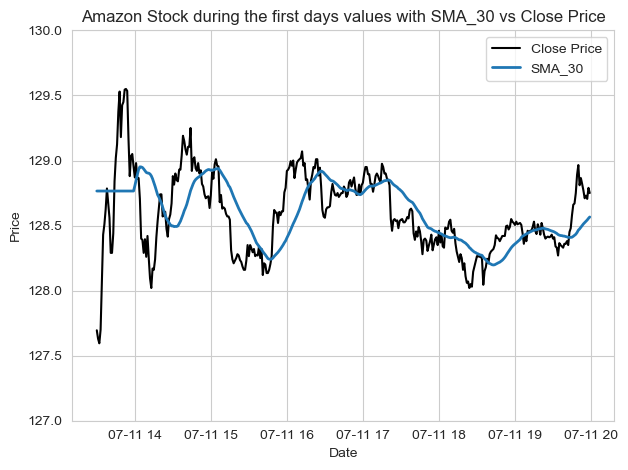

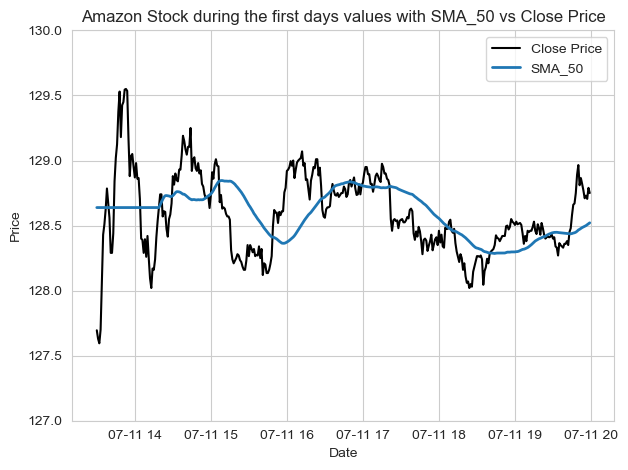

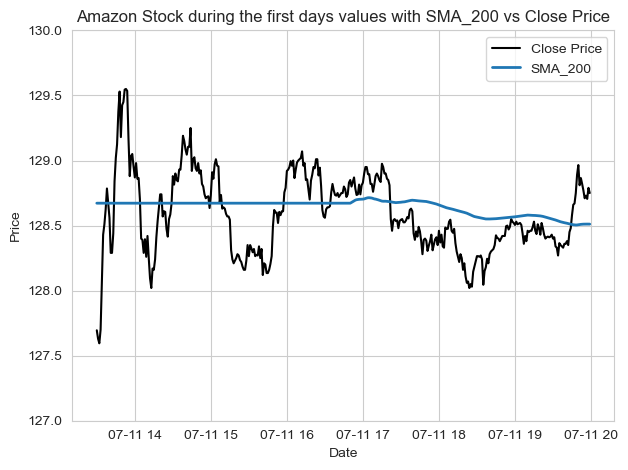

In [15]:
# Define the date range
start = '2023-07-11 13:30:00+00:00'
end = '2023-07-11 19:59:00+00:00'

subset_df = df_new[start:end]

# List of moving averages to plot
moving_averages = ['SMA_2', 'SMA_5', 'SMA_7', 'SMA_10', 'SMA_14', 'SMA_30', 'SMA_50', 'SMA_200']

# Set seaborn style
sns.set_style('whitegrid')

# Plotting each moving average against the close price
plt.figure(figsize=(10, 7))

for ma in moving_averages:
    plt.plot(subset_df.index, subset_df['close'], label='Close Price', color='black')
    plt.plot(subset_df.index, subset_df[ma], label=f'{ma}', linewidth=2)

    plt.title(f'Amazon Stock during the first days values with {ma} vs Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.ylim(127, 130)  # Set y-axis limits
    plt.legend()
    plt.tight_layout()
    plt.show()

The SMA-2 closely follows the closing price but may be overly sensitive to rapid changes and noise.

In contrast, the SMA-7 provides a smoother trend and could be used for plotting points and as a basis for peak and valley indicators.

Going forward, the SMA-7 line will be utilized to filter out noise across all data.

---

**Outlier Observations:**

Multiple applications of Windsorization were tested to retain the most variance of the closing price while filtering out extreme values by visualizing the plots above.

**Model Fine-Tuning Consideration:**

Fine-tuning the model may involve addressing outliers in feature columns based on their impact on the overall model.

**Approach:**

Windsorization seems effective for handling outliers, while the SMA is useful for managing noise.



-----------------------
### Duplicate values check and removal

In [16]:
# Check for duplicate rows
duplicate_rows = df_new[df_new.duplicated()]
print("Duplicate rows:\n", duplicate_rows)

# Optionally, drop duplicate rows
df_new = df_new.drop_duplicates()

Duplicate rows:
                              close      high      low  trade_count      open  \
timestamp                                                                      
2023-07-26 20:29:00+00:00  128.760  128.7600  128.760          2.0  128.7600   
2023-07-26 20:35:00+00:00  128.760  128.7600  128.760          2.0  128.7600   
2023-07-28 12:02:00+00:00  128.265  128.4000  128.235        137.0  128.2900   
2023-07-28 12:03:00+00:00  128.265  128.4000  128.235        137.0  128.2900   
2023-07-28 12:04:00+00:00  128.265  128.4000  128.235        137.0  128.2900   
2023-07-28 12:06:00+00:00  128.265  128.4000  128.235        137.0  128.2900   
2023-07-28 12:07:00+00:00  128.265  128.4000  128.235        137.0  128.2900   
2023-07-28 12:08:00+00:00  128.265  128.4000  128.235        137.0  128.2900   
2023-07-28 12:18:00+00:00  128.265  128.4000  128.235        137.0  128.2900   
2023-08-18 13:28:00+00:00  133.975  134.1900  133.960        137.0  134.1900   
2023-08-23 20:26:00+00:

In [17]:
htmldf(df_new.describe())

-------------------------
## Correlation Check

In [18]:
correlation_df = df_new.corr()
htmldf(correlation_df)

**Correlation Analysis:**

Looking at the data above, it is evident that many variables are highly correlated with the target column (close).

**Dimensionality Reduction:**

To reduce the dimensionality of the current variables and determine which of them contribute the most to the closing price, the variables with high correlations will be pulled out.

**Further Insight:**

Pulling out these variables and then running further analysis within these can help create new variables.

In [19]:
high_correlation_vars = correlation_df.index[abs(correlation_df['close']) >= 0.5]

# Create a DataFrame with only the filtered variables
filtered_df = df_new[high_correlation_vars]

htmldf(filtered_df.head())

In [20]:
# Feature count before removal
initial_feature_count = len(df_new.columns)

# Feature count after removal
filtered_feature_count = len(filtered_df.columns)

initial_feature_count, filtered_feature_count

(216, 91)

In [21]:
htmldf(filtered_df.corr())

### Creating New Features before further reduction

---------------
#### Peak indicator shows whether the value peaks at all at that point
This is done by taking the previous value and seeing if its lower, and the value after and seeing if its below as well. This would show that the current value is a peak.
#### Valley Indicator shows whether the value is in a valley
This one is done in an opposite fashion of the peak by seeing if the values before and after are higher.

In [22]:
# Peak indicator to see if a value is a peak of the closing price

filtered_df = filtered_df.copy()

filtered_df.loc[:, 'peak'] = ((filtered_df['close'].shift(1) < filtered_df['close']) & (filtered_df['close'].shift(-1) < filtered_df['close'])).astype(int)


filtered_df[['close', 'peak']].head(20)


close  peak
timestamp                               
2023-07-11 13:30:00+00:00  127.695     0
2023-07-11 13:31:00+00:00  127.630     0
2023-07-11 13:32:00+00:00  127.595     0
2023-07-11 13:33:00+00:00  127.700     0
2023-07-11 13:34:00+00:00  128.080     0
2023-07-11 13:35:00+00:00  128.430     0
2023-07-11 13:36:00+00:00  128.510     0
2023-07-11 13:37:00+00:00  128.625     0
2023-07-11 13:38:00+00:00  128.785     1
2023-07-11 13:39:00+00:00  128.670     0
2023-07-11 13:40:00+00:00  128.560     0
2023-07-11 13:41:00+00:00  128.290     0
2023-07-11 13:42:00+00:00  128.290     0
2023-07-11 13:43:00+00:00  128.440     0
2023-07-11 13:44:00+00:00  128.840     0
2023-07-11 13:45:00+00:00  129.020     0
2023-07-11 13:46:00+00:00  129.125     0
2023-07-11 13:47:00+00:00  129.375     0
2023-07-11 13:48:00+00:00  129.530     1
2023-07-11 13:49:00+00:00  129.180     0

Above we can see two accurately defined peaks, now we can plot them to double check.

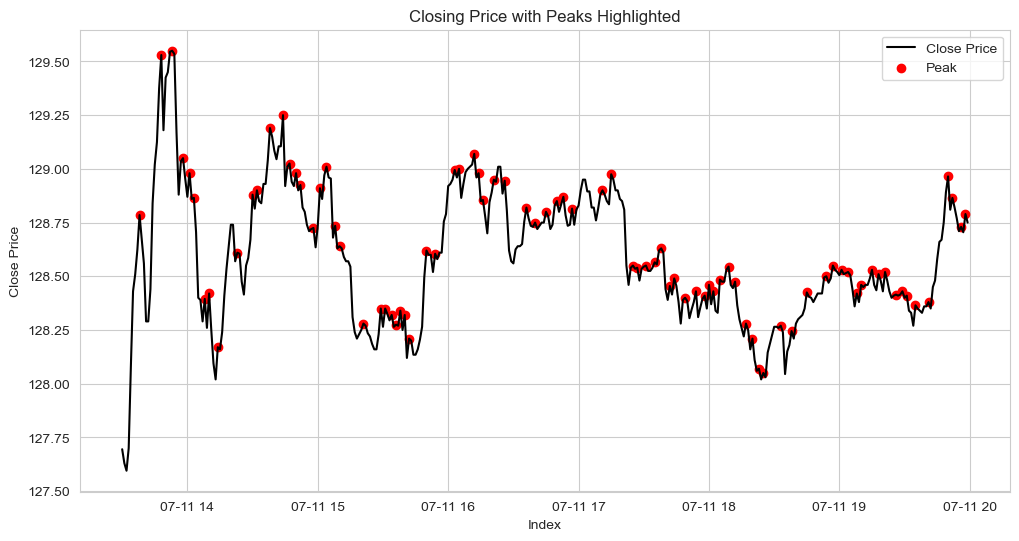

In [23]:
#Snippet of data for visualization
snippet_df = filtered_df[start:end] 

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(snippet_df.index, snippet_df['close'], label='Close Price', color='black')

# Highlight the peaks with red circles
peaks = snippet_df[snippet_df['peak'] == 1]
plt.scatter(peaks.index, peaks['close'], color='red', marker='o', label='Peak')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Closing Price with Peaks Highlighted')
plt.legend()

# Show the plot
plt.show()

We can see from the plot that the peaks are fairly accurately defined so we can assume they are for the rest of the data as well.
A new set of peaks can also be defined indicating extreme peaks.


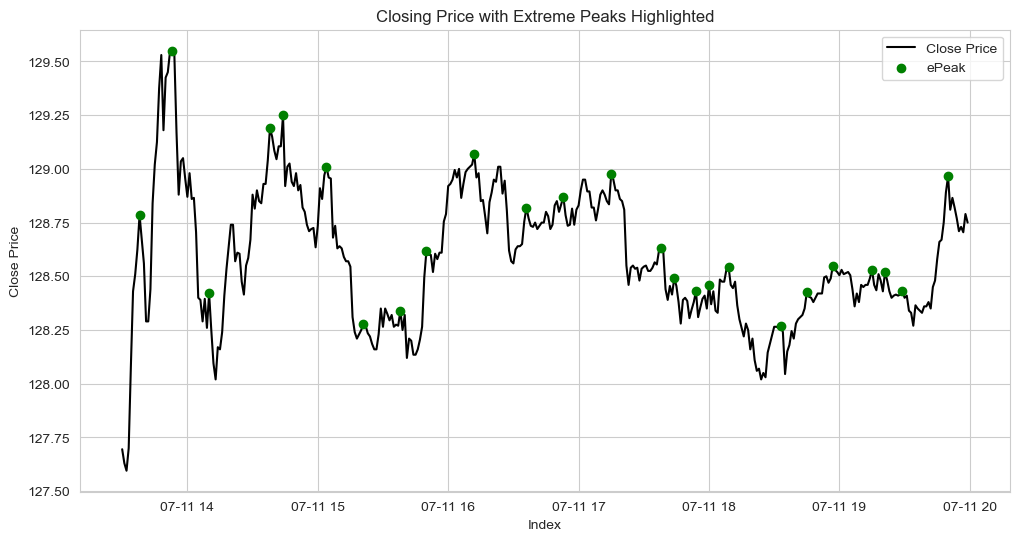

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Ensure that there are no NaN values
filtered_df = filtered_df.ffill().bfill()

# Detect peaks in the 'close' column
peaks, _ = find_peaks(filtered_df['close'])
peak_indices = filtered_df.index[peaks]  # Map peak indices to DataFrame index
filtered_df['peak'] = 0
filtered_df.loc[peak_indices, 'peak'] = 1

# Ensure that the index is in Datetime format and timezone-aware
if not isinstance(filtered_df.index, pd.DatetimeIndex):
    filtered_df.index = pd.to_datetime(filtered_df.index)
if filtered_df.index.tzinfo is None:
    filtered_df.index = filtered_df.index.tz_localize('UTC')  

# Convert DatetimeIndex to RangeIndex for position handling
filtered_df = filtered_df.reset_index()
filtered_df.set_index('timestamp', inplace=True)

# Define function to determine if a peak is an extreme peak
def is_extreme_peak(index):
    if index not in filtered_df.index:
        return 0

    # Convert index to position
    peak_loc = filtered_df.index.get_loc(index)
    
    # Ensure peak_loc is an integer
    if isinstance(peak_loc, slice):
        return 0  # Index should be a single integer, not a slice
    
    # Define the range for previous and next peaks
    before_range = range(max(peak_loc - 4, 0), peak_loc)
    after_range = range(peak_loc + 1, min(peak_loc + 5, len(filtered_df)))
    
    # Get the values of the peaks before and after
    before_peaks = filtered_df.iloc[list(before_range)]['close']
    after_peaks = filtered_df.iloc[list(after_range)]['close']
    
    # Check if the current peak is higher than the 4 previous and 4 next peaks
    if len(before_peaks) < 4 or len(after_peaks) < 4:
        return 0
    
    current_value = filtered_df.loc[index, 'close']
    if (current_value > before_peaks.max()) and (current_value > after_peaks.max()):
        return 1
    else:
        return 0

# Apply the function to determine if each peak is an extreme peak
filtered_df['epeak'] = filtered_df.index.map(is_extreme_peak)

# Ensure timezone-aware timestamps for slicing
start = pd.Timestamp('2023-07-11 13:30:00', tz='UTC')
end = pd.Timestamp('2023-07-11 19:59:00', tz='UTC')

# Extract a snippet for visualization
snippet_2_df = filtered_df.loc[start:end]

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(snippet_2_df.index, snippet_2_df['close'], label='Close Price', color='black')

# Highlight the extreme peaks with green circles
epeaks = snippet_2_df[snippet_2_df['epeak'] == 1]
plt.scatter(epeaks.index, epeaks['close'], color='green', marker='o', label='ePeak', zorder=5)  # zorder to bring markers to the front

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Closing Price with Extreme Peaks Highlighted')
plt.legend()

# Show the plot
plt.show()


### Extreme Peaks (ePeak) Indicator

In this analysis, the **ePeak** indicator identifies peaks that are higher than the previous four peaks and the next four peaks. This approach ensures that only the most significant peaks are considered, leading to a more accurate indication of true peaks in the dataset.

**Importance of the ePeak Indicator:**

- **Predictive Value:** By using future models to predict these significant peaks, investors can be prompted to take action, such as selling their stake, at optimal times.
- **Strategic Decision-Making:** This indicator helps in making informed investment decisions by pinpointing critical moments when stock values reach their highest points.

This refined approach enhances the reliability of peak detection and provides actionable insights for investment strategies.


------------------
## Valley Indicator Creation

In [25]:
# Peak indicator to see if a value is a peak of the closing price

filtered_df.loc[:, 'valley'] = ((filtered_df['close'].shift(1) > filtered_df['close']) & (filtered_df['close'].shift(-1) > filtered_df['close'])).astype(int)


filtered_df[['close', 'valley']].head(20)

close  valley
timestamp                                 
2023-07-11 13:30:00+00:00  127.695       0
2023-07-11 13:31:00+00:00  127.630       0
2023-07-11 13:32:00+00:00  127.595       1
2023-07-11 13:33:00+00:00  127.700       0
2023-07-11 13:34:00+00:00  128.080       0
2023-07-11 13:35:00+00:00  128.430       0
2023-07-11 13:36:00+00:00  128.510       0
2023-07-11 13:37:00+00:00  128.625       0
2023-07-11 13:38:00+00:00  128.785       0
2023-07-11 13:39:00+00:00  128.670       0
2023-07-11 13:40:00+00:00  128.560       0
2023-07-11 13:41:00+00:00  128.290       0
2023-07-11 13:42:00+00:00  128.290       0
2023-07-11 13:43:00+00:00  128.440       0
2023-07-11 13:44:00+00:00  128.840       0
2023-07-11 13:45:00+00:00  129.020       0
2023-07-11 13:46:00+00:00  129.125       0
2023-07-11 13:47:00+00:00  129.375       0
2023-07-11 13:48:00+00:00  129.530       0
2023-07-11 13:49:00+00:00  129.180       1

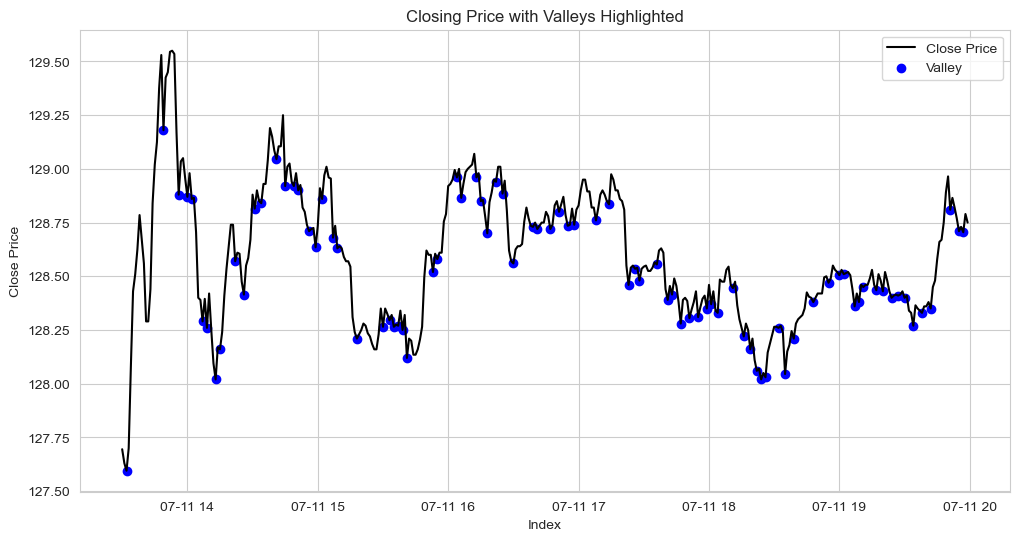

In [26]:
#Snippet of data for visualization
snippet_df = filtered_df[start:end] 

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(snippet_df.index, snippet_df['close'], label='Close Price', color='black')

# Highlight the peaks with red circles
peaks = snippet_df[snippet_df['valley'] == 1]
plt.scatter(peaks.index, peaks['close'], color='blue', marker='o', label='Valley')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Closing Price with Valleys Highlighted')
plt.legend()

# Show the plot
plt.show()

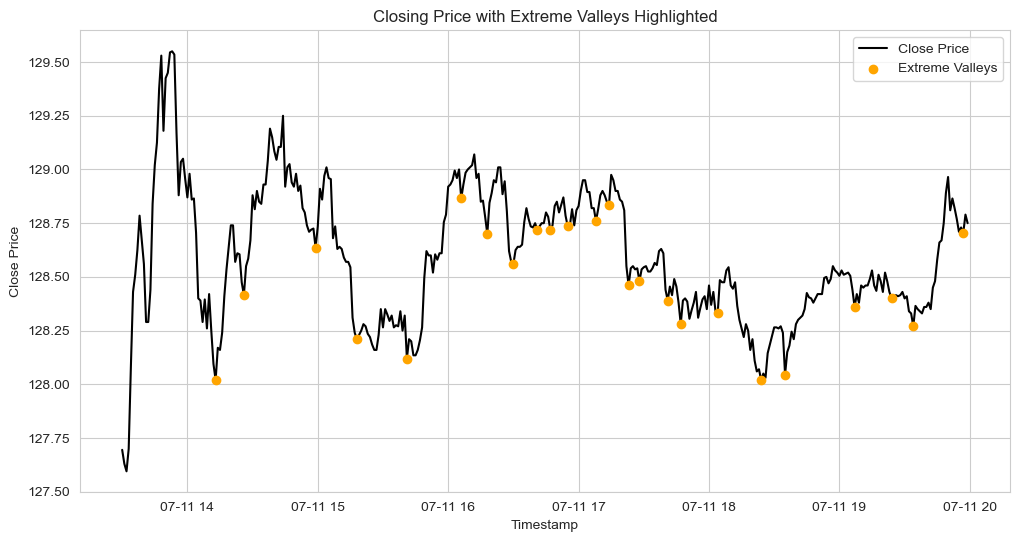

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Ensure that there are no NaN values
filtered_df = filtered_df.ffill().bfill()

# Detect valleys in the 'close' column by using the negative values
valleys, _ = find_peaks(-filtered_df['close'])
valley_indices = filtered_df.index[valleys]  # Map valley indices to DataFrame index
filtered_df['valley'] = 0
filtered_df.loc[valley_indices, 'valley'] = 1

# Ensure that the index is in Datetime format and timezone-aware
if not isinstance(filtered_df.index, pd.DatetimeIndex):
    filtered_df.index = pd.to_datetime(filtered_df.index)
if filtered_df.index.tzinfo is None:
    filtered_df.index = filtered_df.index.tz_localize('UTC')  

# Define function to determine if a valley is an extreme valley
def is_extreme_valley(index):
    if index not in filtered_df.index:
        return 0

    # Convert index to position
    valley_loc = filtered_df.index.get_loc(index)
    
    # Ensure valley_loc is an integer
    if isinstance(valley_loc, slice):
        return 0  # Index should be a single integer, not a slice
    
    # Define the range for previous and next valleys
    before_range = range(max(valley_loc - 4, 0), valley_loc)
    after_range = range(valley_loc + 1, min(valley_loc + 5, len(filtered_df)))
    
    # Get the values of the valleys before and after
    before_valleys = filtered_df.iloc[list(before_range)]['close']
    after_valleys = filtered_df.iloc[list(after_range)]['close']
    
    # Check if the current valley is lower than the 4 previous and 4 next valleys
    if len(before_valleys) < 4 or len(after_valleys) < 4:
        return 0
    
    current_value = filtered_df.loc[index, 'close']
    if (current_value < before_valleys.min()) and (current_value < after_valleys.min()):
        return 1
    else:
        return 0

# Apply the function to determine if each valley is an extreme valley
filtered_df['evalley'] = filtered_df.index.map(is_extreme_valley)

# Ensure timezone-aware timestamps for slicing
start = pd.Timestamp('2023-07-11 13:30:00', tz='UTC')
end = pd.Timestamp('2023-07-11 19:59:00', tz='UTC')

# Extract a snippet for visualization
snippet_2_df = filtered_df.loc[start:end]

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(snippet_2_df.index, snippet_2_df['close'], label='Close Price', color='black')

# Highlight the extreme valleys with red circles
evalleys = snippet_2_df[snippet_2_df['evalley'] == 1]
plt.scatter(evalleys.index, evalleys['close'], color='orange', marker='o', label='Extreme Valleys', zorder=5)  # zorder to bring markers to the front

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Closing Price with Extreme Valleys Highlighted')
plt.legend()

# Show the plot
plt.show()


### Extreme Valleys (eValley) Indicator

In this analysis, the **eValley** indicator identifies valleys that are lower than the previous four valleys and the next four valleys. This method ensures that only the most significant valleys are considered, leading to a more accurate indication of true valleys in the dataset.

**Importance of the eValley Indicator:**

- **Predictive Value:** By using future models to predict these significant valleys, investors can be prompted to buy more of the stock at optimal times.
- **Strategic Decision-Making:** This indicator aids in making informed investment decisions by identifying critical moments when stock values reach their lowest points.

This refined approach enhances the reliability of valley detection and provides actionable insights for investment strategies.


--------------------------------------
## Other Stocks Peak and Valley Indicator Creation

In [28]:
# Peaks
filtered_df.loc[:, 'g_peak'] = ((filtered_df['GOOGL'].shift(1) < filtered_df['GOOGL']) & (filtered_df['GOOGL'].shift(-1) < filtered_df['GOOGL'])).astype(int)
filtered_df.loc[:, 'm_peak'] = ((filtered_df['META'].shift(1) < filtered_df['META']) & (filtered_df['META'].shift(-1) < filtered_df['META'])).astype(int)
filtered_df.loc[:, 'w_peak'] = ((filtered_df['WMT'].shift(1) < filtered_df['WMT']) & (filtered_df['WMT'].shift(-1) < filtered_df['WMT'])).astype(int)
filtered_df.loc[:, 'b_peak'] = ((filtered_df['BABA'].shift(1) < filtered_df['BABA']) & (filtered_df['BABA'].shift(-1) < filtered_df['BABA'])).astype(int)
filtered_df.loc[:, 'ms_peak'] = ((filtered_df['MSFT'].shift(1) < filtered_df['MSFT']) & (filtered_df['MSFT'].shift(-1) < filtered_df['MSFT'])).astype(int)

# Valleys
filtered_df.loc[:, 'g_valley'] = ((filtered_df['GOOGL'].shift(1) > filtered_df['GOOGL']) & (filtered_df['GOOGL'].shift(-1) > filtered_df['GOOGL'])).astype(int)
filtered_df.loc[:, 'm_valley'] = ((filtered_df['META'].shift(1) > filtered_df['META']) & (filtered_df['META'].shift(-1) > filtered_df['META'])).astype(int)
filtered_df.loc[:, 'w_valley'] = ((filtered_df['WMT'].shift(1) > filtered_df['WMT']) & (filtered_df['WMT'].shift(-1) > filtered_df['WMT'])).astype(int)
filtered_df.loc[:, 'b_valley'] = ((filtered_df['BABA'].shift(1) > filtered_df['BABA']) & (filtered_df['BABA'].shift(-1) > filtered_df['BABA'])).astype(int)
filtered_df.loc[:, 'ms_valley'] = ((filtered_df['MSFT'].shift(1) > filtered_df['MSFT']) & (filtered_df['MSFT'].shift(-1) > filtered_df['MSFT'])).astype(int)


In [29]:
print('Number of Features Before: 91')
new_column_c = len(filtered_df.columns)
print(f'Number of Features After : {new_column_c}')

Number of Features Before: 91
Number of Features After : 105


---------------
## Creation of New Feature Ratios

-----------
### Close to Open Ratio

In [30]:
filtered_df['c_o_ratio'] = filtered_df['close']/filtered_df['open']

filtered_df[['c_o_ratio','close','open']].head(10)

c_o_ratio    close     open
timestamp                                             
2023-07-11 13:30:00+00:00   0.999843  127.695  127.715
2023-07-11 13:31:00+00:00   1.000235  127.630  127.600
2023-07-11 13:32:00+00:00   0.999569  127.595  127.650
2023-07-11 13:33:00+00:00   1.000627  127.700  127.620
2023-07-11 13:34:00+00:00   1.002976  128.080  127.700
2023-07-11 13:35:00+00:00   1.001638  128.430  128.220
2023-07-11 13:36:00+00:00   1.000779  128.510  128.410
2023-07-11 13:37:00+00:00   1.001284  128.625  128.460
2023-07-11 13:38:00+00:00   1.000738  128.785  128.690
2023-07-11 13:39:00+00:00   0.999146  128.670  128.780

-------------
### 'Close' rolling interval ratios

In [31]:
filtered_df['1_ratio'] =filtered_df['close']/filtered_df['close'].shift(1) # CP/CP 1 min ago
filtered_df['5_ratio'] = filtered_df['close']/filtered_df['close'].shift(5) # CP/CP 5 mins ago
filtered_df['10_ratio'] = filtered_df['close']/filtered_df['close'].shift(10) # CP/CP 10 mins ago
filtered_df['20_ratio'] = filtered_df['close']/filtered_df['close'].shift(20) # CP/CP 20 mins ago
filtered_df['30_ratio'] = filtered_df['close']/filtered_df['close'].shift(30) # CP/CP 30 mins ago
filtered_df['60_ratio'] = filtered_df['close']/filtered_df['close'].shift(60) # CP/CP 60 mins ago
filtered_df['120_ratio'] = filtered_df['close']/filtered_df['close'].shift(120) # CP/CP 2 hours ago
filtered_df['720_ratio'] = filtered_df['close']/filtered_df['close'].shift(720) # CP/CP 6 hours ago
filtered_df[['1_ratio','5_ratio','10_ratio','20_ratio','30_ratio','60_ratio','120_ratio','close']].head(121)

1_ratio   5_ratio  10_ratio  20_ratio  30_ratio  \
timestamp                                                                     
2023-07-11 13:30:00+00:00       NaN       NaN       NaN       NaN       NaN   
2023-07-11 13:31:00+00:00  0.999491       NaN       NaN       NaN       NaN   
2023-07-11 13:32:00+00:00  0.999726       NaN       NaN       NaN       NaN   
2023-07-11 13:33:00+00:00  1.000823       NaN       NaN       NaN       NaN   
2023-07-11 13:34:00+00:00  1.002976       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2023-07-11 15:26:00+00:00  0.999805  0.999065  0.998831  0.993835  0.995727   
2023-07-11 15:27:00+00:00  1.000000  0.999142  0.999376  0.995959  0.995649   
2023-07-11 15:28:00+00:00  1.000546  0.999961  1.000156  0.996077  0.996155   
2023-07-11 15:29:00+00:00  1.000936  1.001014  1.000936  0.997823  0.997784   
2023-07-11 15:30:00+00:00  0.999338  1.000624  1.000117  0.997085  0.996349   

                           60_ratio  120_ratio    close  
timestamp                                                
2023-07-11 13:30:00+00:00       NaN        NaN  127.695  
2023-07-11 13:31:00+00:00       NaN        NaN  127.630  
2023-07-11 13:32:00+00:00       NaN        NaN  127.595  
2023-07-11 13:33:00+00:00       NaN        NaN  127.700  
2023-07-11 13:34:00+00:00       NaN        NaN  128.080  
...                             ...        ...      ...  
2023-07-11 15:26:00+00:00  0.998014        NaN  128.160  
2023-07-11 15:27:00+00:00  0.996966        NaN  128.160  
2023-07-11 15:28:00+00:00  0.997239        NaN  128.230  
2023-07-11 15:29:00+00:00  0.997513        NaN  128.350  
2023-07-11 15:30:00+00:00  0.995228   1.004464  128.265  

[121 rows x 8 columns]

#### For other stocks

In [32]:
# META 
filtered_df['1m_ratio'] =filtered_df['META']/filtered_df['META'].shift(1) # CP/CP 1 min ago
filtered_df['5m_ratio'] = filtered_df['META']/filtered_df['META'].shift(5) # CP/CP 5 mins ago
filtered_df['10m_ratio'] = filtered_df['META']/filtered_df['META'].shift(10) # CP/CP 10 mins ago
filtered_df['20m_ratio'] = filtered_df['META']/filtered_df['META'].shift(20) # CP/CP 20 mins ago
filtered_df['30m_ratio'] = filtered_df['META']/filtered_df['META'].shift(30) # CP/CP 30 mins ago
filtered_df['60m_ratio'] = filtered_df['META']/filtered_df['META'].shift(60) # CP/CP 60 mins ago
filtered_df['120m_ratio'] = filtered_df['META']/filtered_df['META'].shift(120) # CP/CP 2 hours ago
filtered_df['720m_ratio'] = filtered_df['META']/filtered_df['META'].shift(720) # CP/CP 6 hours ago
# Google
filtered_df['1g_ratio'] =filtered_df['GOOGL']/filtered_df['GOOGL'].shift(1) # CP/CP 1 min ago
filtered_df['5g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(5) # CP/CP 5 mins ago
filtered_df['10g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(10) # CP/CP 10 mins ago
filtered_df['20g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(20) # CP/CP 20 mins ago
filtered_df['30g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(30) # CP/CP 30 mins ago
filtered_df['60g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(60) # CP/CP 60 mins ago
filtered_df['120g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(120) # CP/CP 2 hours ago
filtered_df['720g_ratio'] = filtered_df['GOOGL']/filtered_df['GOOGL'].shift(720) # CP/CP 6 hours ago
# BABA
filtered_df['1b_ratio'] =filtered_df['BABA']/filtered_df['BABA'].shift(1) # CP/CP 1 min ago
filtered_df['5b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(5) # CP/CP 5 mins ago
filtered_df['10b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(10) # CP/CP 10 mins ago
filtered_df['20b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(20) # CP/CP 20 mins ago
filtered_df['30b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(30) # CP/CP 30 mins ago
filtered_df['60b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(60) # CP/CP 60 mins ago
filtered_df['120b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(120) # CP/CP 2 hours ago
filtered_df['720b_ratio'] = filtered_df['BABA']/filtered_df['BABA'].shift(720) # CP/CP 6 hours ago
# Microsoft
filtered_df['1ms_ratio'] =filtered_df['MSFT']/filtered_df['MSFT'].shift(1) # CP/CP 1 min ago
filtered_df['5ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(5) # CP/CP 5 mins ago
filtered_df['10ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(10) # CP/CP 10 mins ago
filtered_df['20ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(20) # CP/CP 20 mins ago
filtered_df['30ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(30) # CP/CP 30 mins ago
filtered_df['60ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(60) # CP/CP 60 mins ago
filtered_df['120ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(120) # CP/CP 2 hours ago
filtered_df['720ms_ratio'] = filtered_df['MSFT']/filtered_df['MSFT'].shift(720) # CP/CP 6 hours ago
# Walmart
filtered_df['1w_ratio'] =filtered_df['WMT']/filtered_df['WMT'].shift(1) # CP/CP 1 min ago
filtered_df['5w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(5) # CP/CP 5 mins ago
filtered_df['10w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(10) # CP/CP 10 mins ago
filtered_df['20w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(20) # CP/CP 20 mins ago
filtered_df['30w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(30) # CP/CP 30 mins ago
filtered_df['60w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(60) # CP/CP 60 mins ago
filtered_df['120w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(120) # CP/CP 2 hours ago
filtered_df['720w_ratio'] = filtered_df['WMT']/filtered_df['WMT'].shift(720) # CP/CP 6 hours ago


In [33]:
filtered_df = filtered_df.dropna(subset=['720_ratio','720w_ratio','720ms_ratio','720g_ratio','720g_ratio','720m_ratio'])

### Peak price to valley price Ratio

In [34]:
# Check for duplicate indexes
if filtered_df.index.duplicated().any():
    print("Duplicate indexes found. Removing duplicates...")
    # Remove duplicates by keeping the first occurrence
    filtered_df = filtered_df[~filtered_df.index.duplicated(keep='first')]


Duplicate indexes found. Removing duplicates...


In [35]:
print('Number of Features Before : 105')

new_column_c = len(filtered_df.columns)

print(f'Number of Features After : {new_column_c}')

Number of Features Before : 105
Number of Features After : 154


In [36]:
filtered_df.isna().sum().sum()

0

### Amazon/Other Stocks Ratios

In [37]:
# Amazon/META
filtered_df['A_M_ratio'] = filtered_df['close']/filtered_df['META']
# Amazon/Walmart
filtered_df['A_W_ratio'] = filtered_df['close']/filtered_df['WMT']
# Amazon/BABA
filtered_df['A_B_ratio'] = filtered_df['close']/filtered_df['BABA']
# Amazon/Google
filtered_df['A_G_ratio'] = filtered_df['close']/filtered_df['GOOGL']
# Amazon/Microsoft
filtered_df['A_MS_ratio'] = filtered_df['close']/filtered_df['MSFT']

### Amazon - Other stocks Price Difference

In [38]:
# Amazon - META
filtered_df['A-M'] = filtered_df['close']-filtered_df['META']
# Amazon - Walmart
filtered_df['A-W'] = filtered_df['close']-filtered_df['WMT']
# Amazon - BABA
filtered_df['A-B'] = filtered_df['close']-filtered_df['BABA']
# Amazon - Google
filtered_df['A-G'] = filtered_df['close']-filtered_df['GOOGL']
# Amazon - Microsoft
filtered_df['A-MS'] = filtered_df['close']-filtered_df['MSFT']

print('Number of Features Before : 154')

new_column_c = len(filtered_df.columns)

print(f'Number of Features After : {new_column_c}')

Number of Features Before : 154
Number of Features After : 164


---------------------
### Augmented Dickey Fuller Test for Stationarity

ADF Test without lag:
ADF Statistic: -0.341926
p-value: 0.919353
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -41.464296
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -36.618368
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -37.270275
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -35.683488
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -36.566775
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -35.704683
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -36.509976
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -35.563260
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Statistic: -35.568531
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567

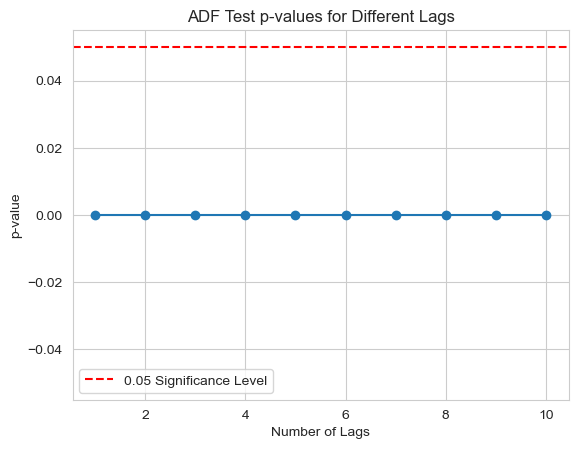

In [39]:
from statsmodels.tsa.stattools import adfuller


# Function to perform ADF test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return result[1]

# Check stationarity without lag
print('ADF Test without lag:')
adf_test(filtered_df['close'])

# Create differenced series for different lags and test stationarity
max_lag = 10
p_values = []
for lag in range(1, max_lag + 1):
    filtered_df[f'close_diff_{lag}'] = filtered_df['close'].diff(lag)
    p_value = adf_test(filtered_df[f'close_diff_{lag}'].dropna())
    p_values.append((lag, p_value))

# Find the minimum number of lags that make the series stationary
for lag, p_value in p_values:
    if p_value < 0.05:
        print(f'The series becomes stationary with {lag} lag(s).')
        break
else:
    print('The series does not become stationary with up to 10 lags.')

# Plotting p-values for different lags
lags, p_values = zip(*p_values)
plt.plot(lags, p_values, marker='o')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 Significance Level')
plt.xlabel('Number of Lags')
plt.ylabel('p-value')
plt.title('ADF Test p-values for Different Lags')
plt.legend()
plt.show()

It seems that to make the closing price stationary all we need to do is add one lag.
This is done by dropping the other lags in the step below.

In [53]:
columns_to_drop = ['close_diff_2','close_diff_3','close_diff_4','close_diff_5','close_diff_6','close_diff_7', 'close_diff_8','close_diff_9','close_diff_10']
filtered_df = filtered_df.drop(columns = columns_to_drop)

In [58]:
filtered_df.isna().sum().sum()

1

In [59]:
filtered_df.isna().sum()

close           0
high            0
low             0
open            0
vwap            0
               ..
A-W             0
A-B             0
A-G             0
A-MS            0
close_diff_1    1
Length: 165, dtype: int64

In [65]:
filtered_df = filtered_df.dropna(subset = 'close_diff_1')

In [66]:
filtered_df.isna().sum()

close           0
high            0
low             0
open            0
vwap            0
               ..
A-W             0
A-B             0
A-G             0
A-MS            0
close_diff_1    0
Length: 165, dtype: int64

------------------------------------------------------------
Now that we have new features, we can apply some information gaining methods to identify the most important contributors. Additionally, it is worthwhile to evaluate which factors have the greatest impact on peak and valley indicators, as these variables are crucial for investor decision-making.


In [67]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# List of potential targets
targets = ['peak', 'valley', 'epeak', 'evalley', 'close']

# Prepare an empty dictionary to store mutual information scores
mi_scores = {target: {} for target in targets}

# Prepare feature matrix X and labels y for each target
X = filtered_df.drop(columns=targets)
X = pd.get_dummies(X)  # Convert categorical variables to dummy/indicator variables

for target in targets:
    y = filtered_df[target]
    
    # Calculate mutual information
    if y.nunique() <= 2:  # Binary or multiclass classification
        mi = mutual_info_classif(X, y)
    else:  # Regression
        mi = mutual_info_regression(X, y)
    
    # Store mutual information scores
    mi_scores[target] = dict(zip(X.columns, mi))

# Convert mutual information scores to DataFrames for better visualization
mi_dfs = {target: pd.DataFrame(list(score.items()), columns=['Feature', 'Mutual Information']).sort_values(by='Mutual Information', ascending=False) for target, score in mi_scores.items()}

# Print the top features for each target
for target, df in mi_dfs.items():
    print(f"Top features for {target}:")
    print(df.head(10))  # Print top 10 features
    print()

Top features for peak:
          Feature  Mutual Information
101       1_ratio            0.214715
159  close_diff_1            0.212564
100     c_o_ratio            0.094331
102       5_ratio            0.021358
90         g_peak            0.016817
117      1g_ratio            0.016309
133     1ms_ratio            0.015041
109      1m_ratio            0.013277
94        ms_peak            0.013169
95       g_valley            0.011887

Top features for valley:
          Feature  Mutual Information
101       1_ratio            0.223681
159  close_diff_1            0.221429
100     c_o_ratio            0.096045
102       5_ratio            0.022018
117      1g_ratio            0.018134
95       g_valley            0.017939
133     1ms_ratio            0.015414
109      1m_ratio            0.014391
99      ms_valley            0.014336
96       m_valley            0.013874

Top features for epeak:
          Feature  Mutual Information
101       1_ratio            0.054251
159  close_dif

close           0
high            0
low             0
open            0
vwap            0
               ..
A-W             0
A-B             0
A-G             0
A-MS            0
close_diff_1    1
Length: 165, dtype: int64

-------------------
### Histogram Analysis to look at distributions (Ignore for Now)

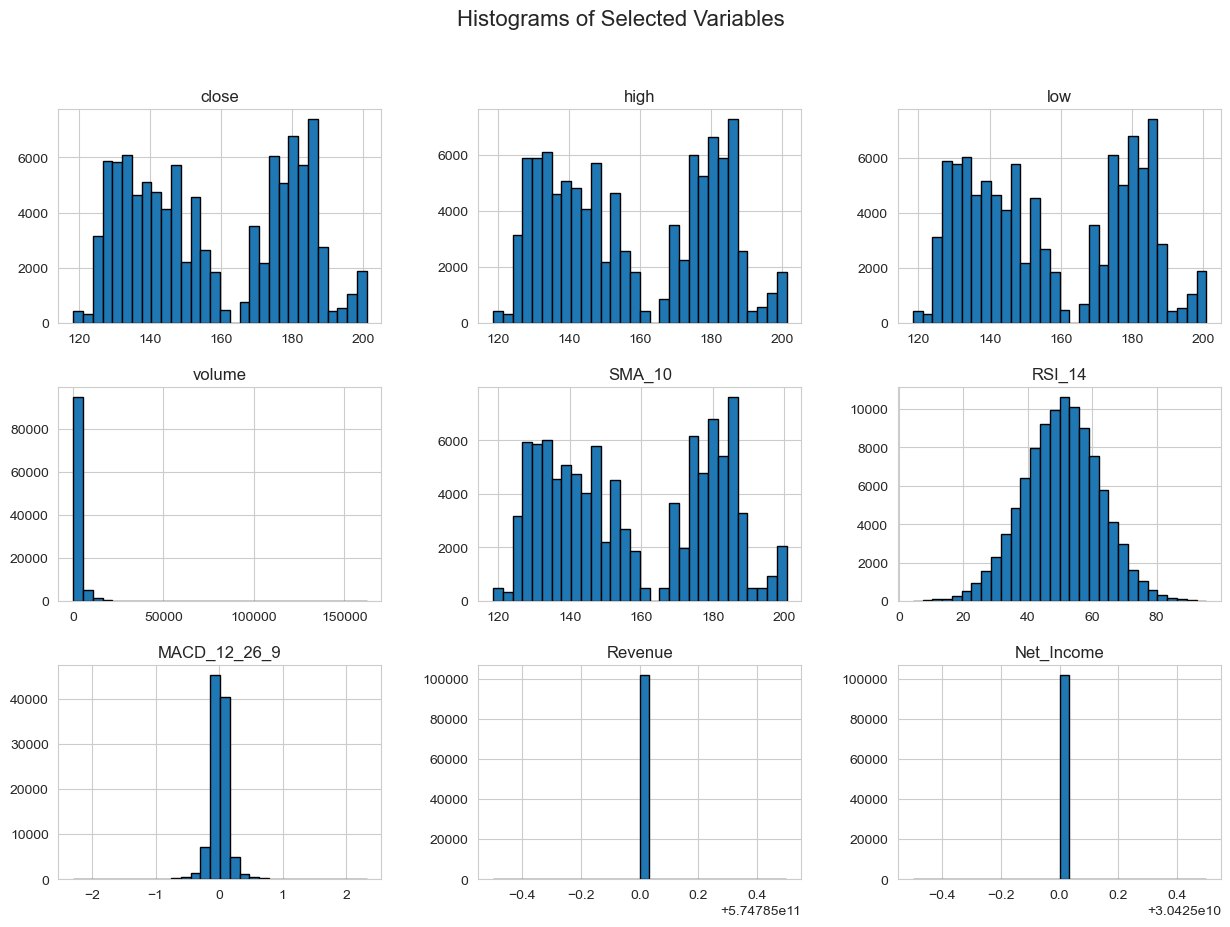

In [40]:
import matplotlib.pyplot as plt

# Select the variables for plotting histograms
variables_to_plot = df_new[['close', 'high', 'low', 'volume', 'SMA_10', 'RSI_14', 'MACD_12_26_9', 'Revenue', 'Net_Income']]

# Plot histograms
variables_to_plot.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Selected Variables', fontsize=16)
plt.show()


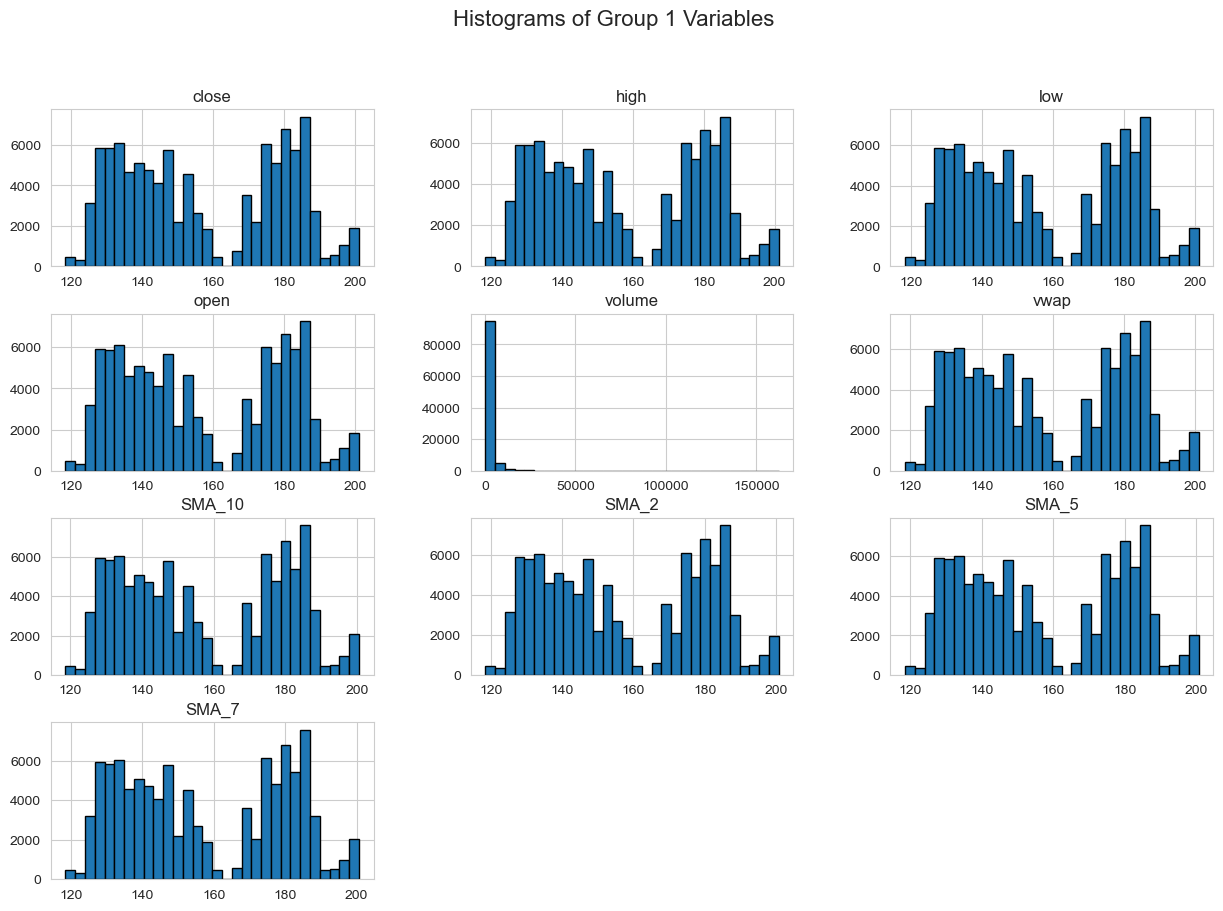

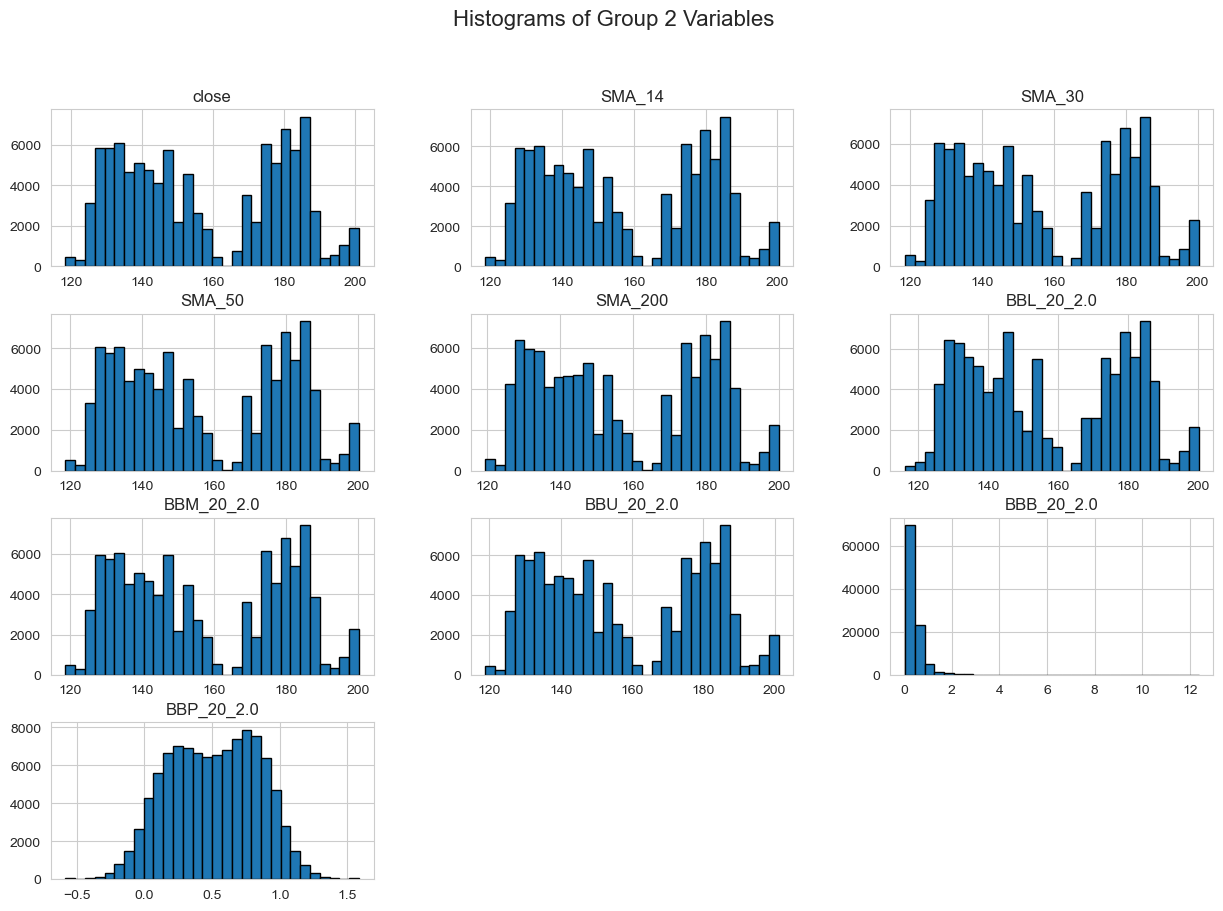

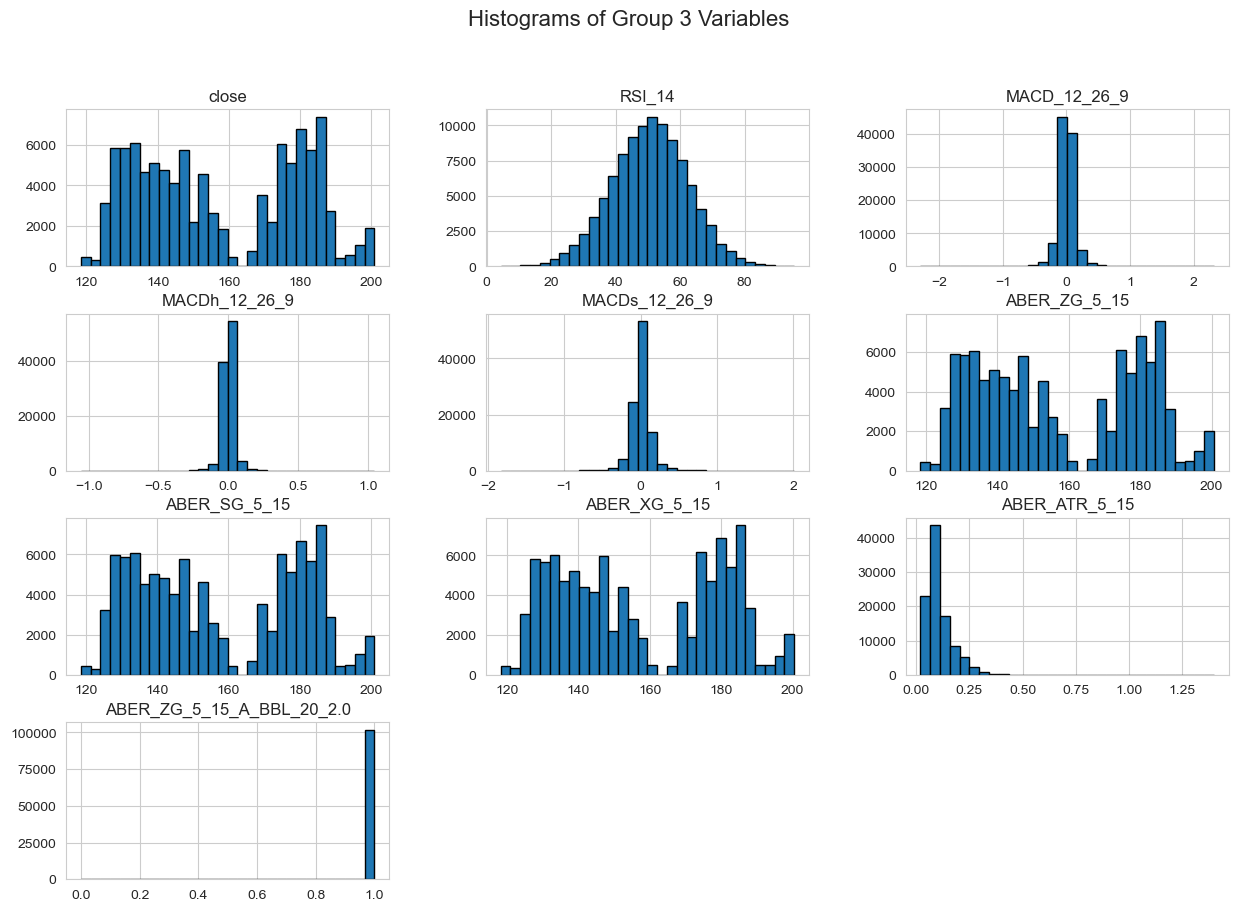

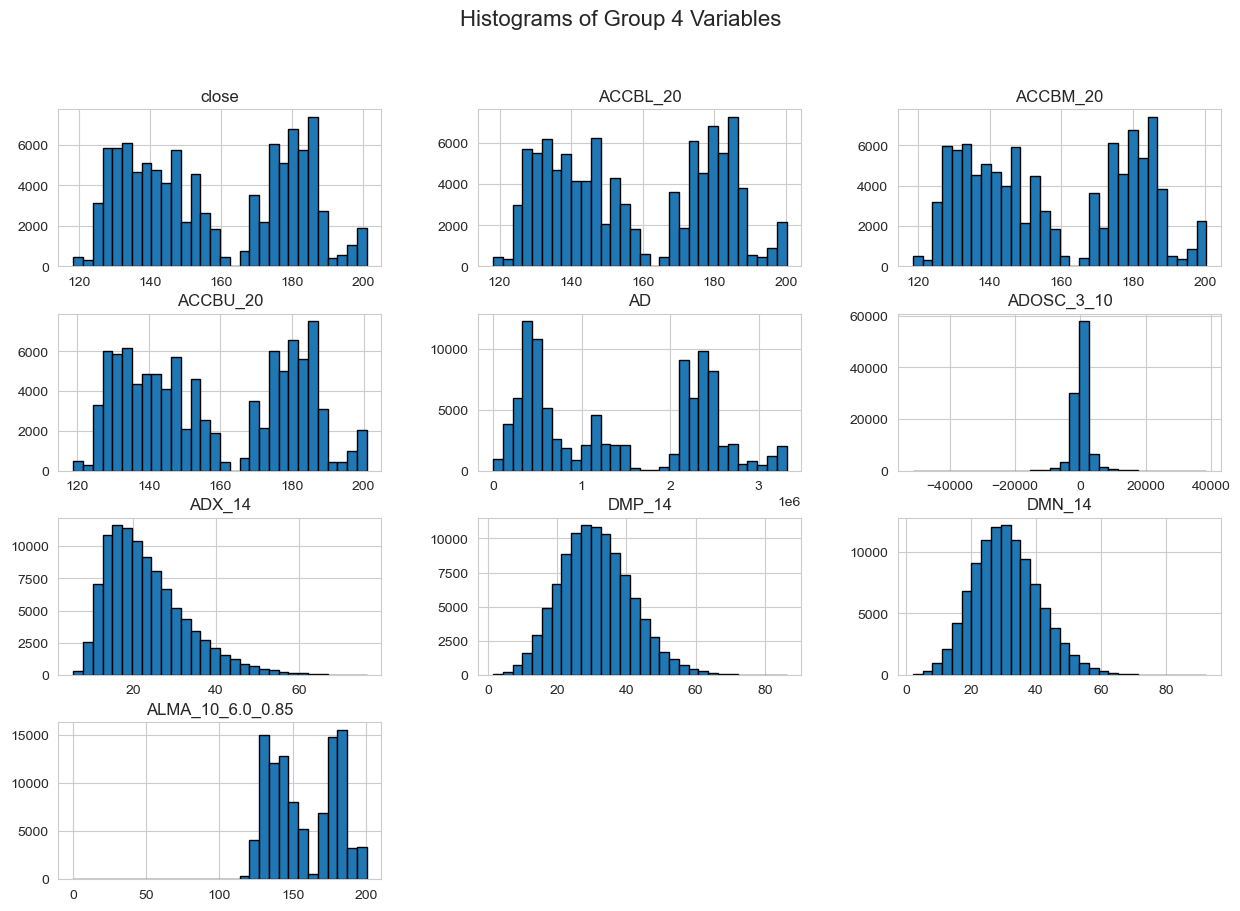

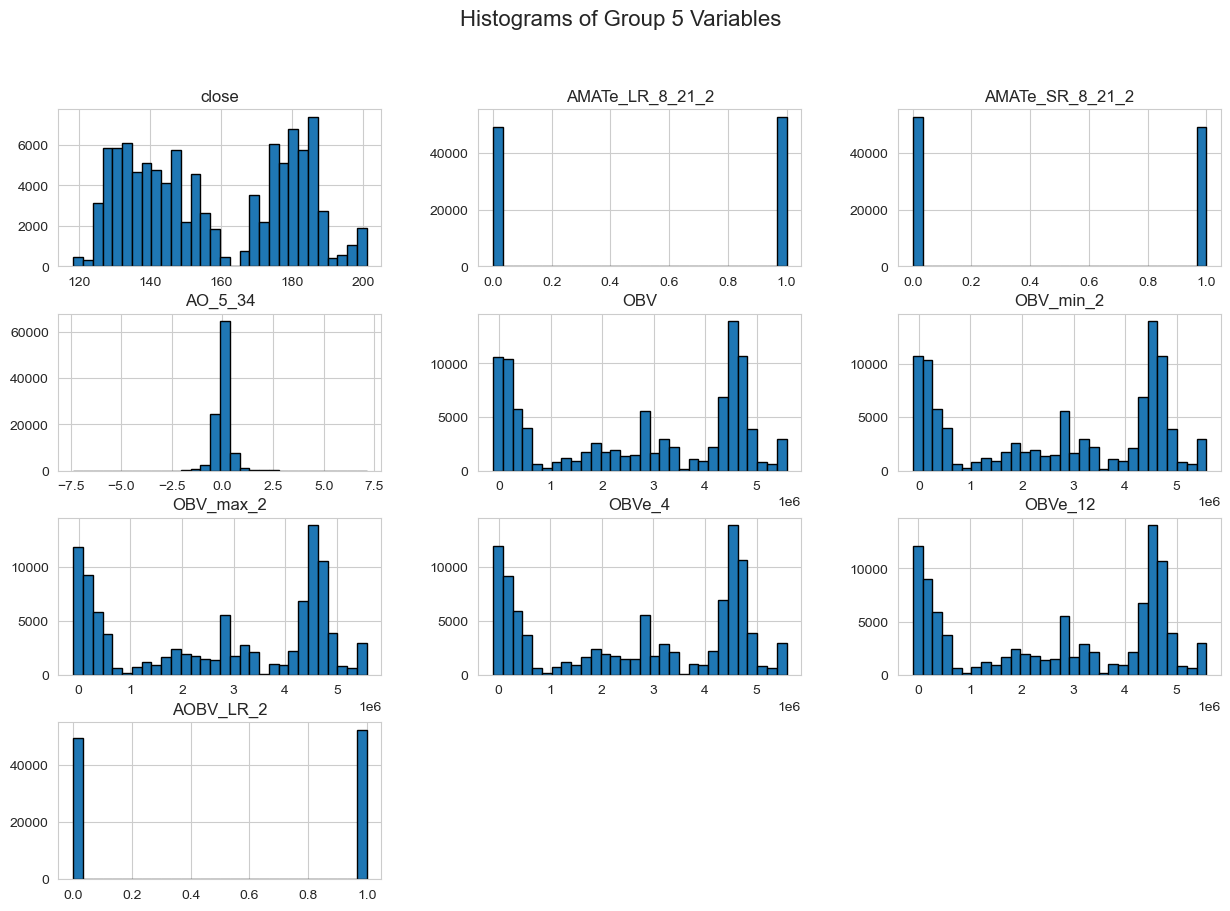

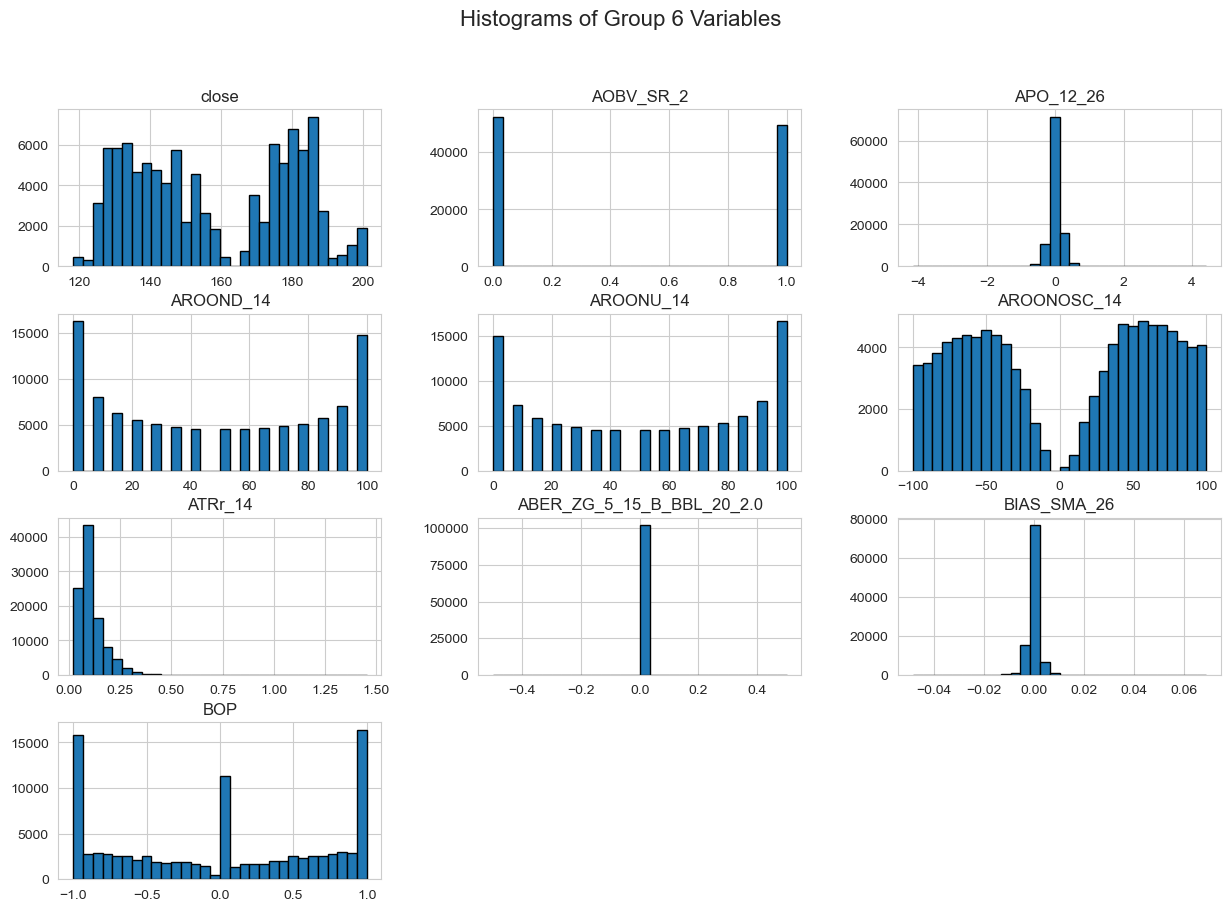

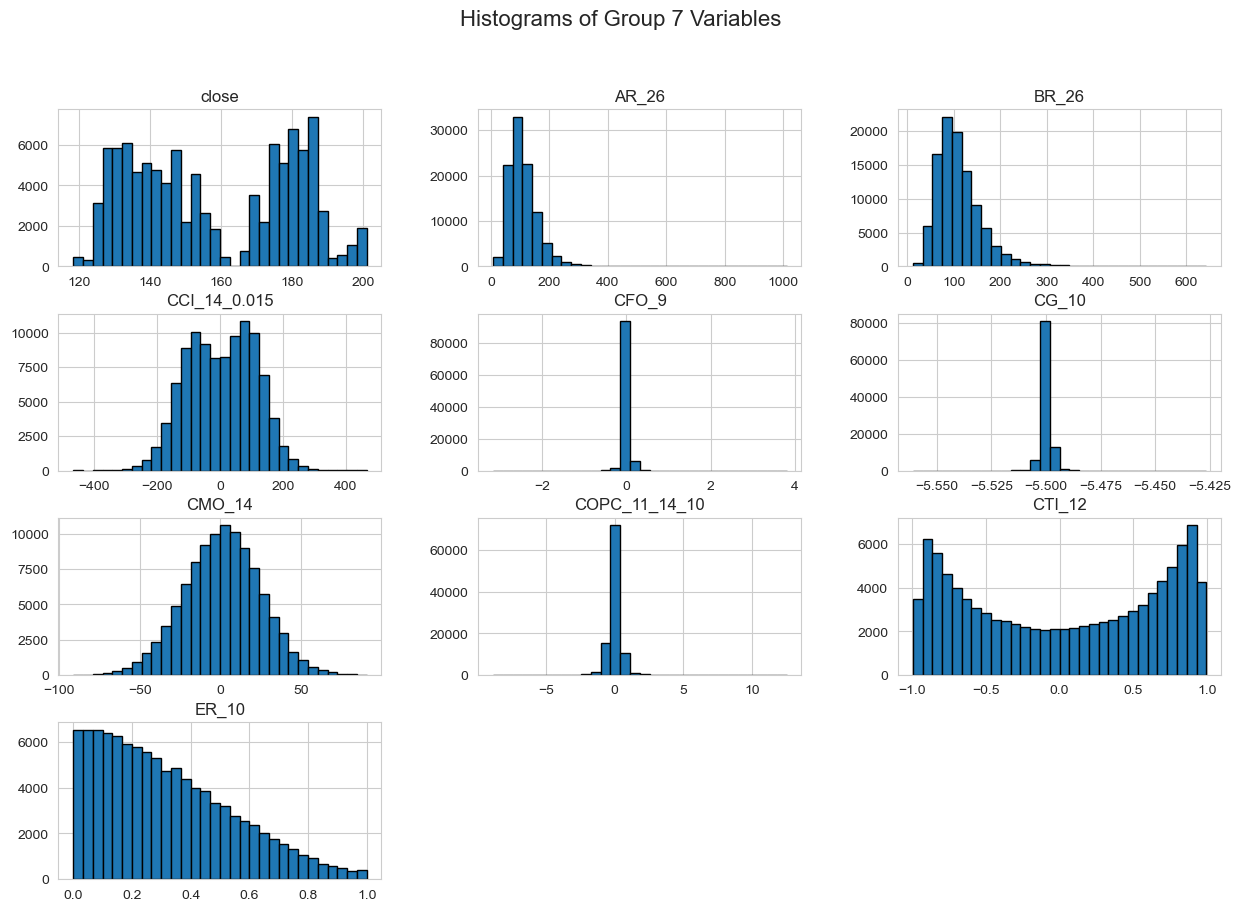

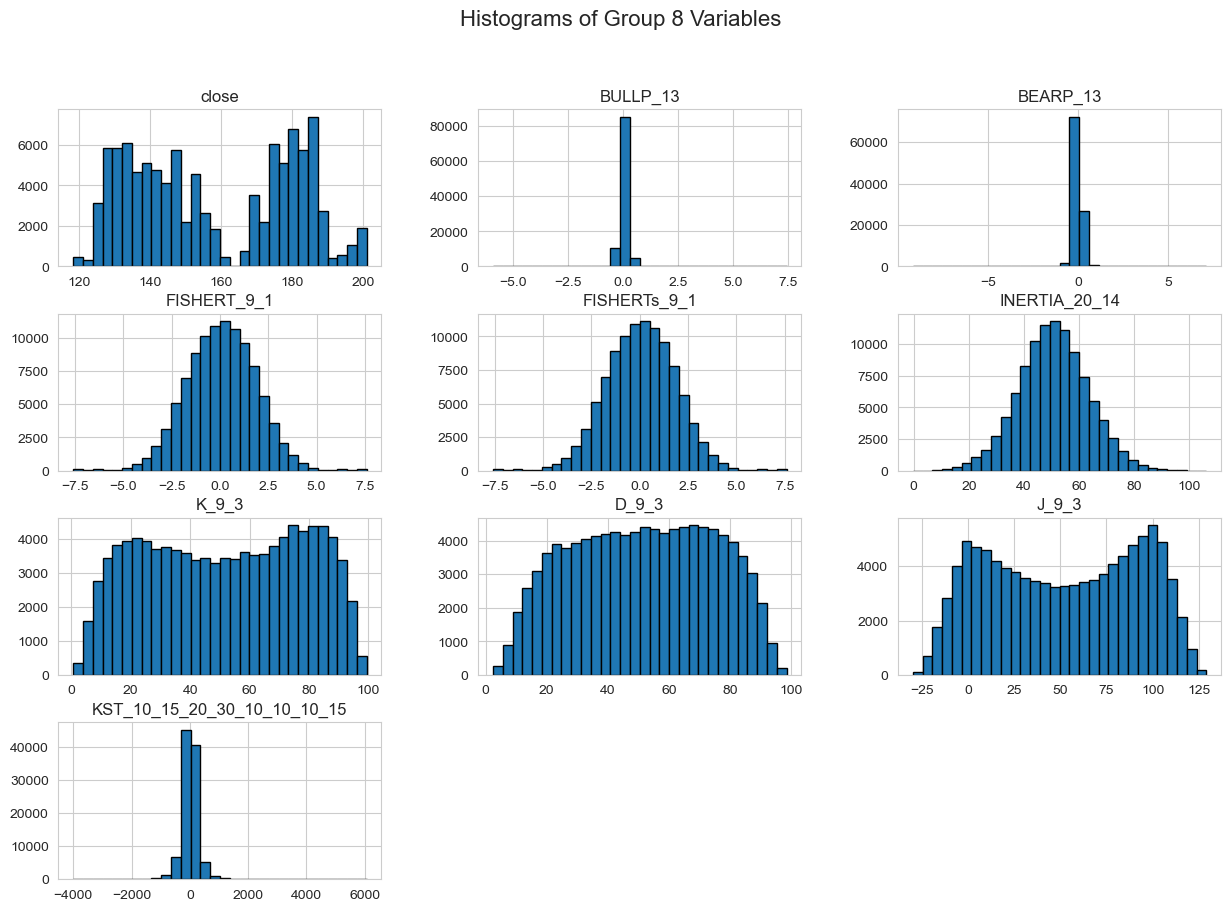

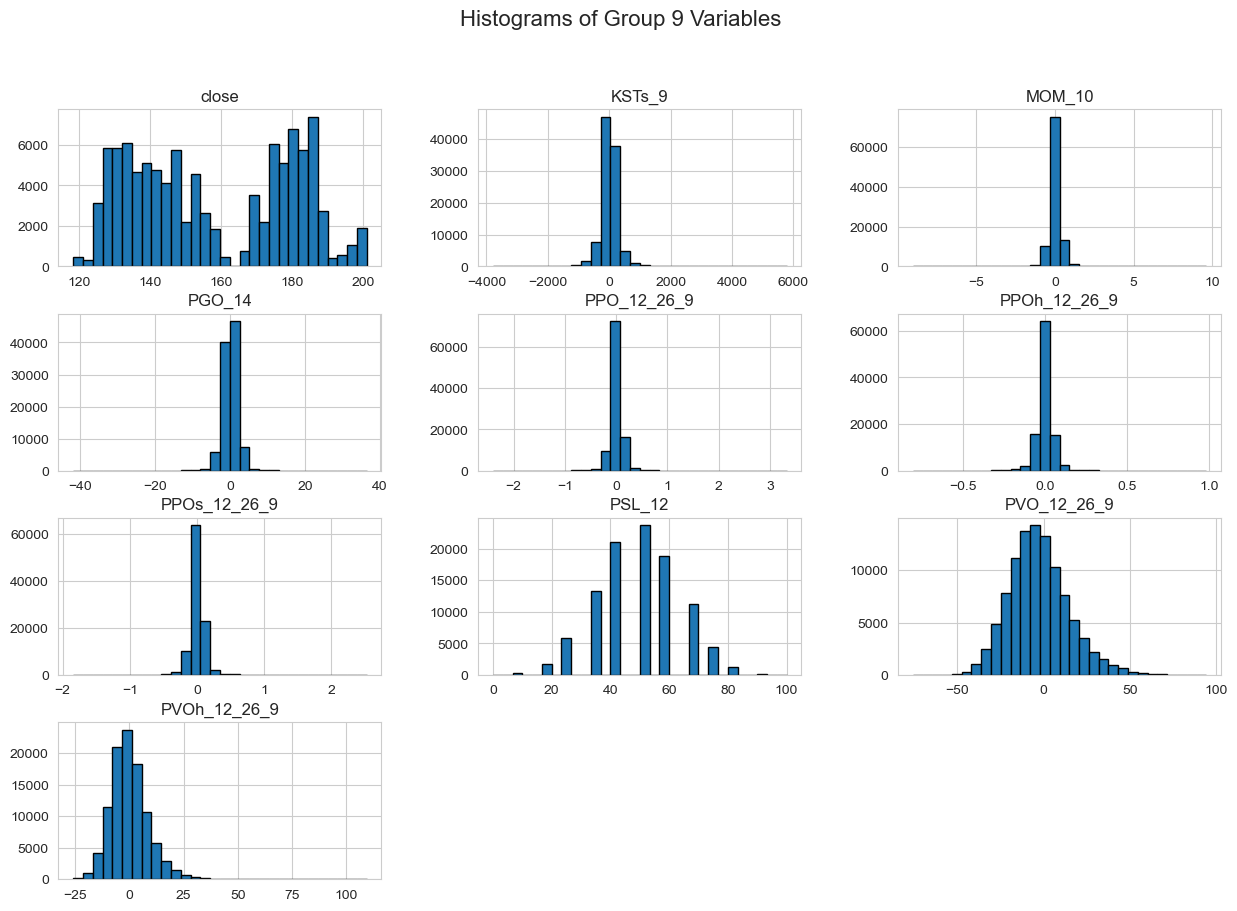

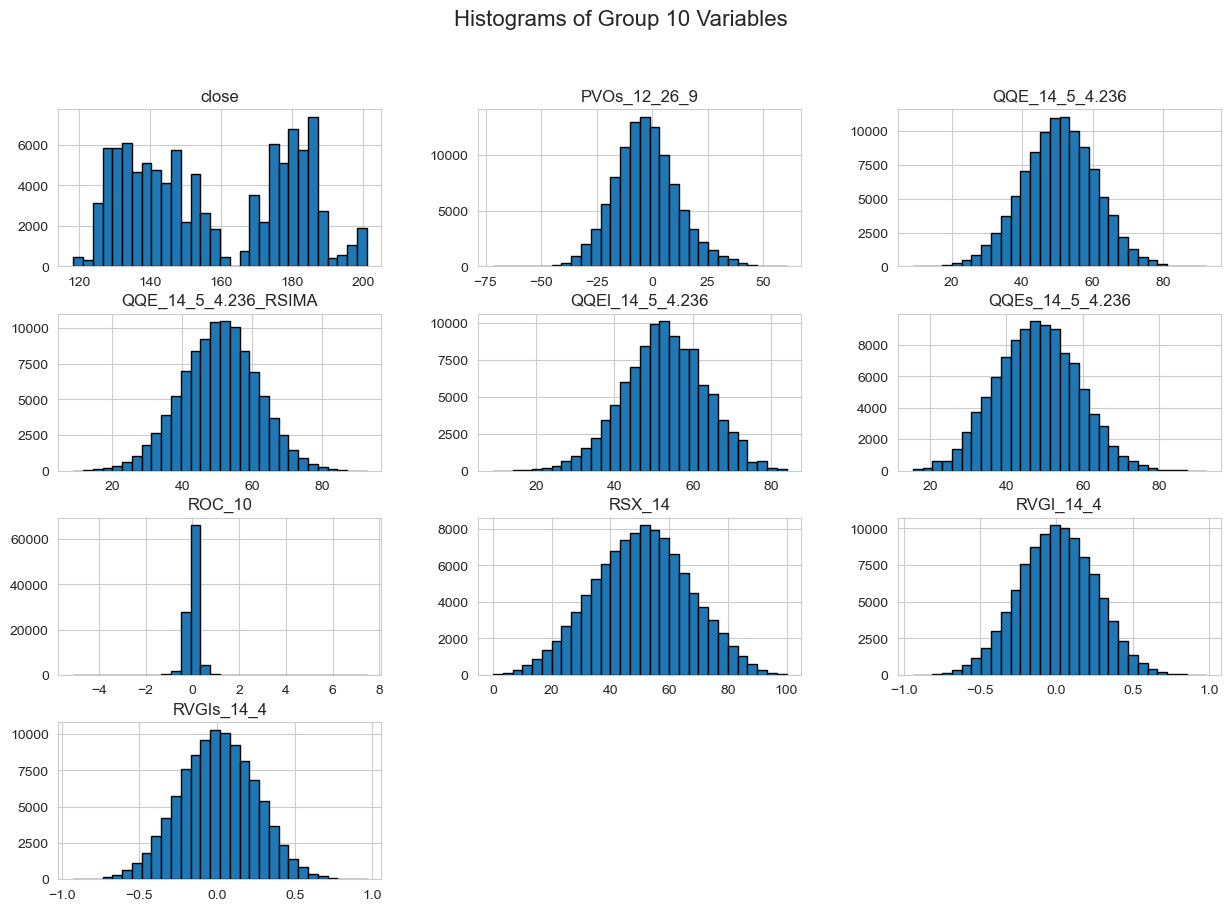

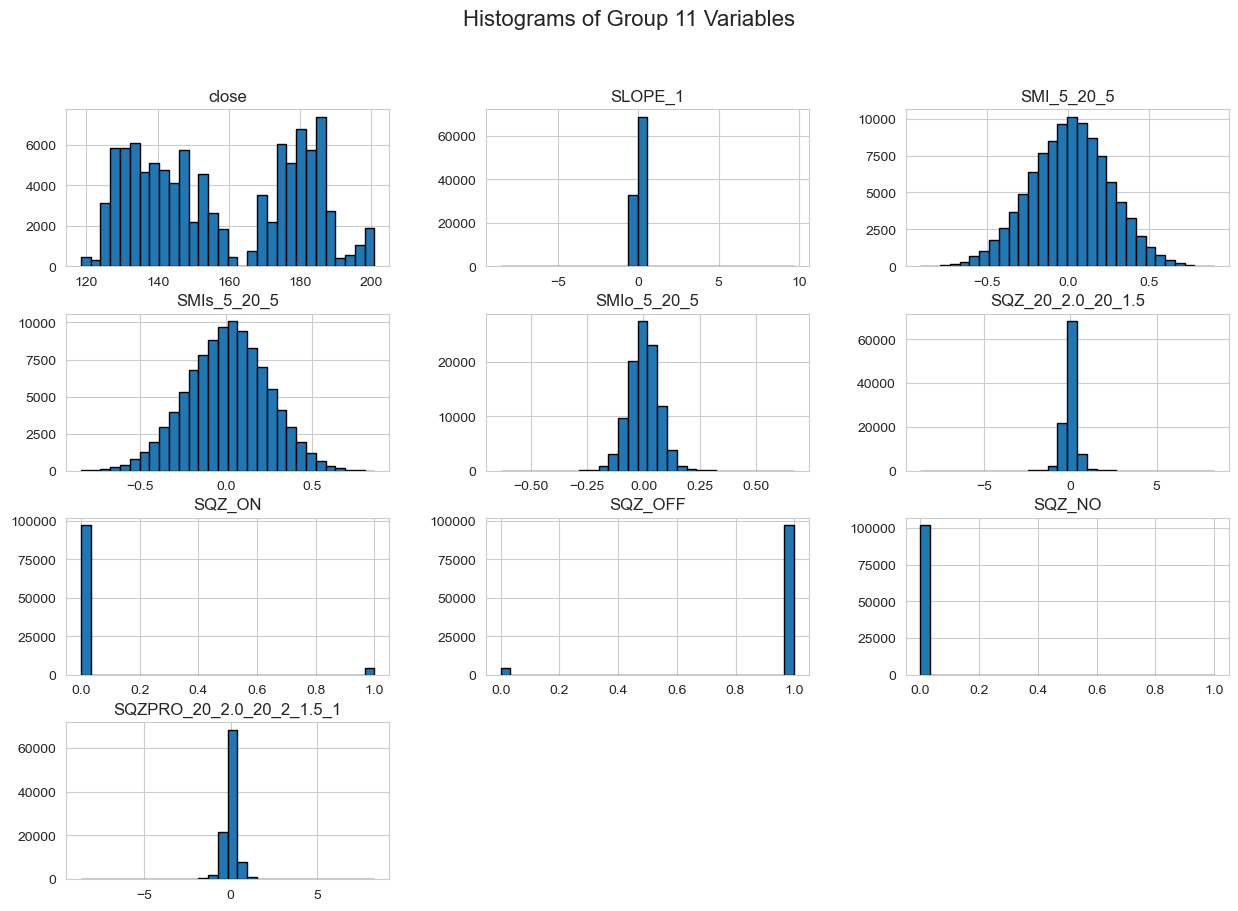

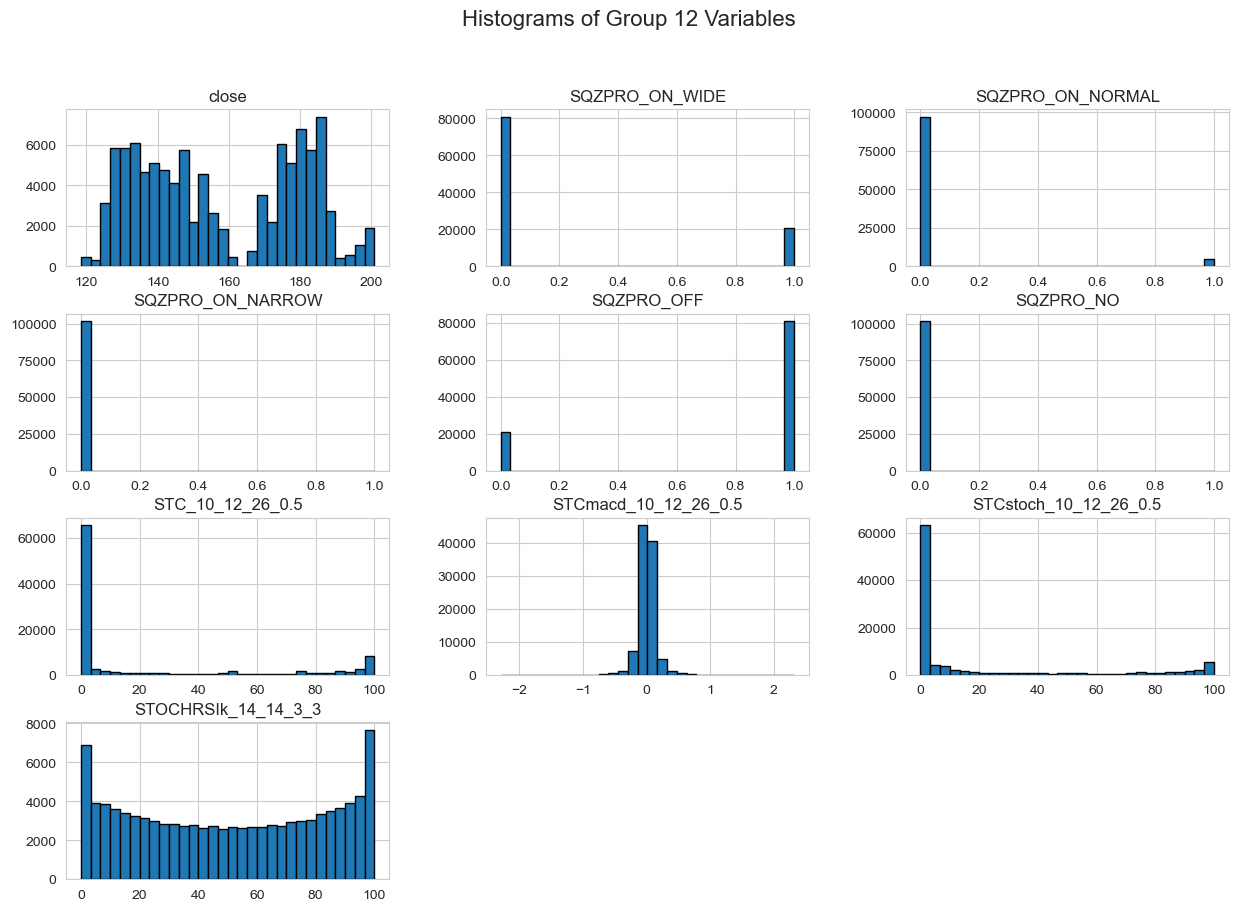

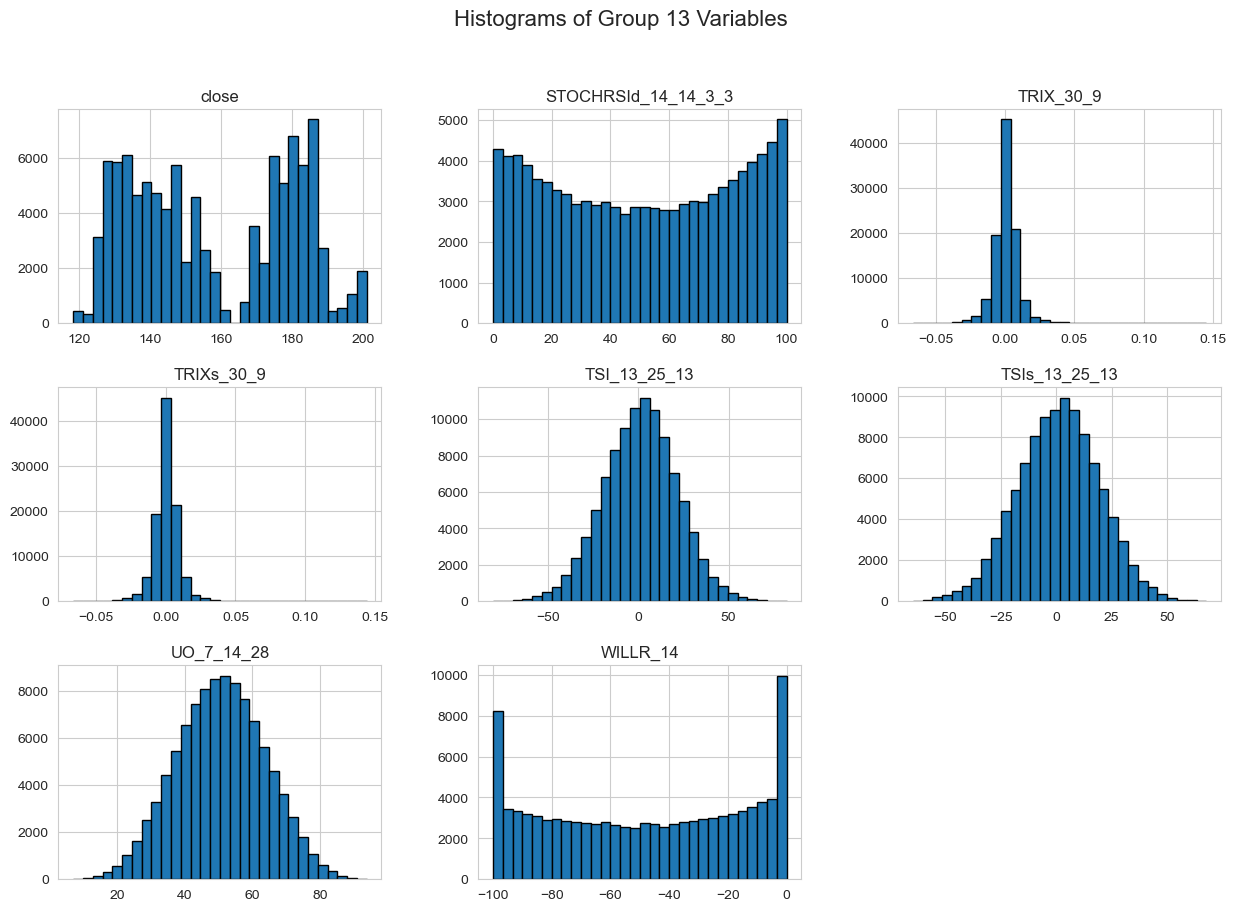

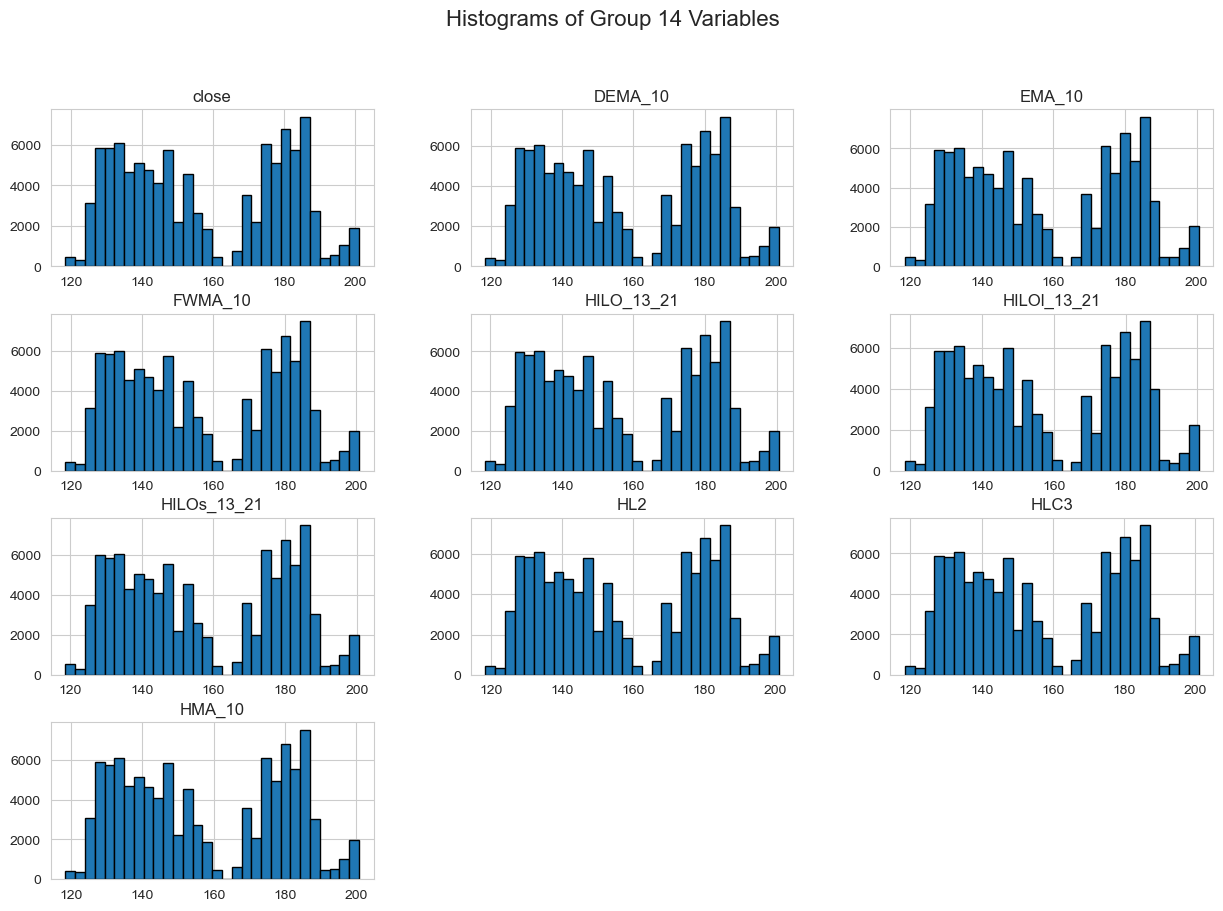

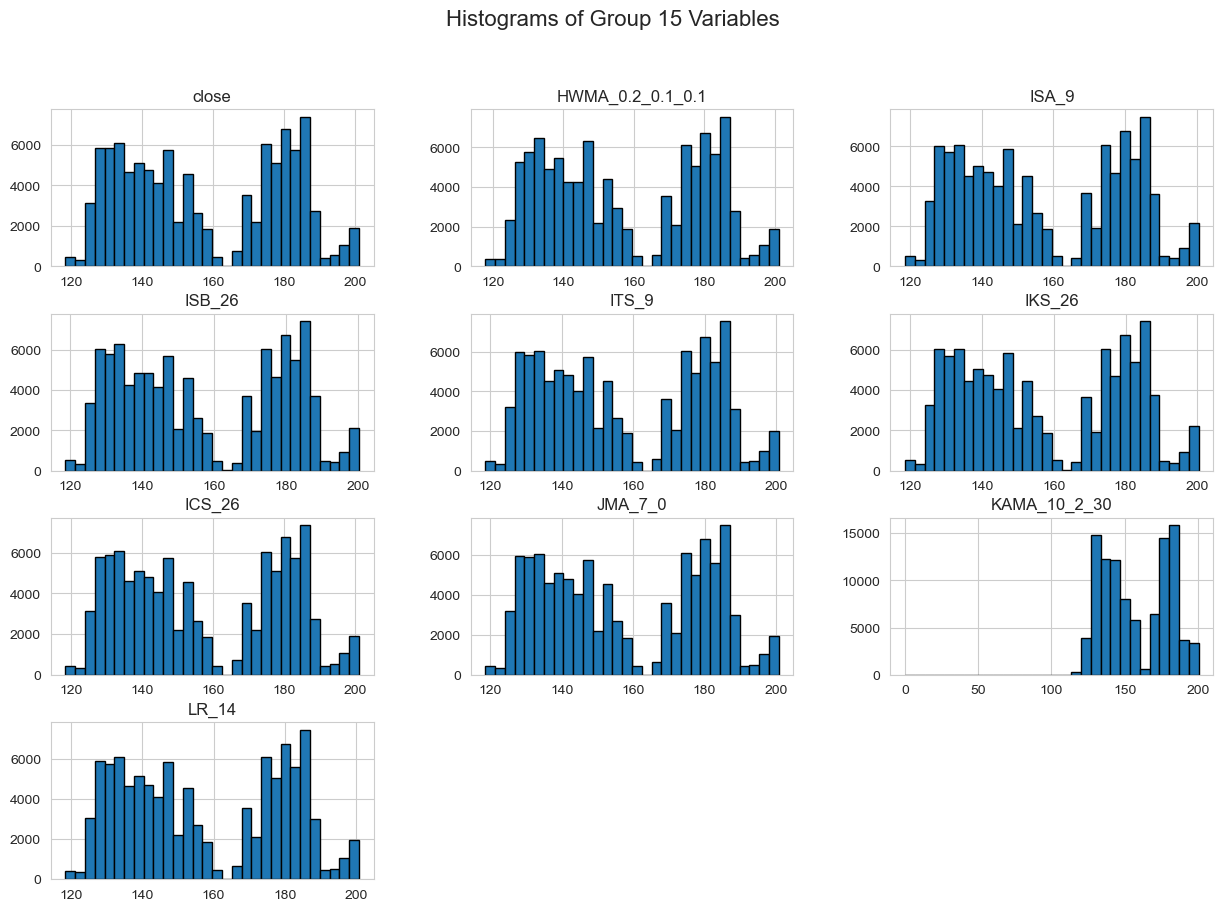

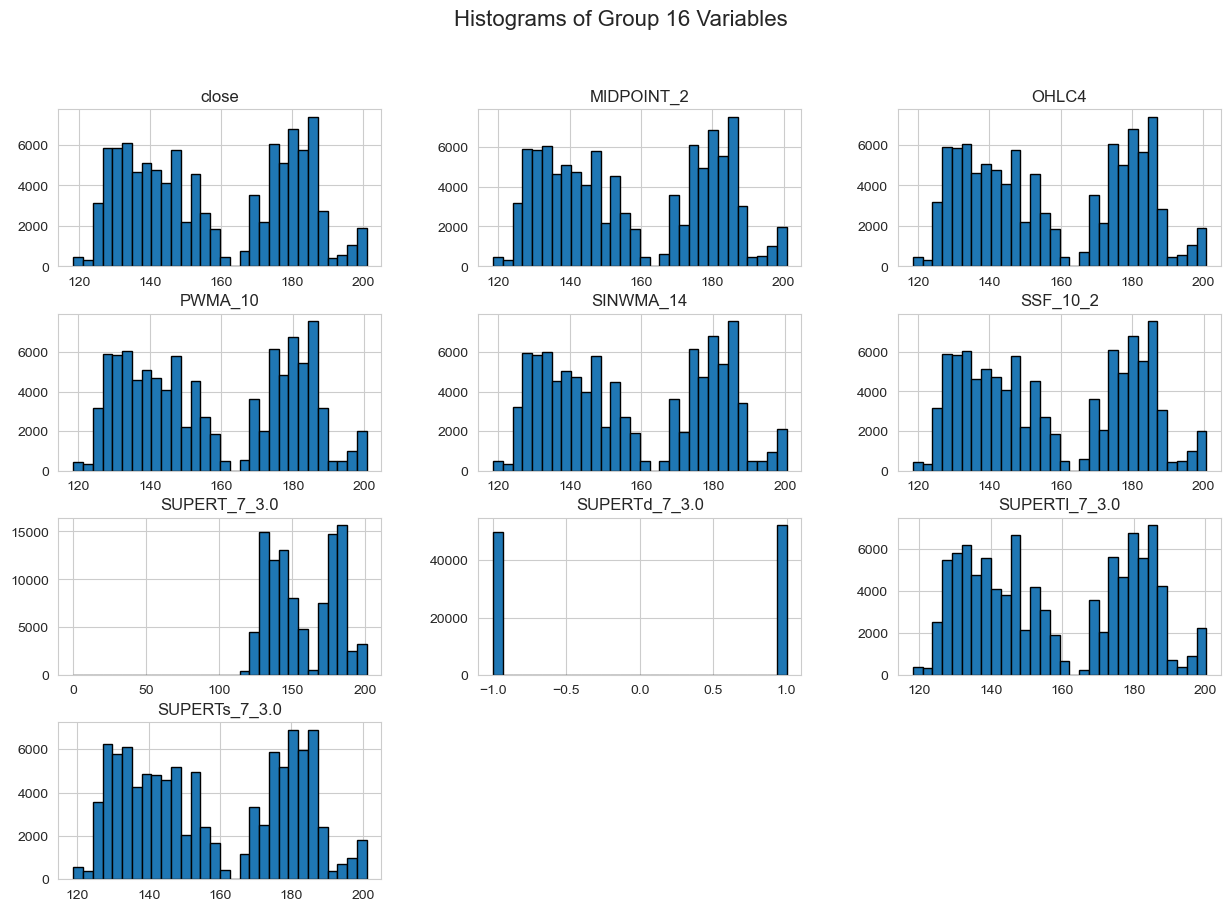

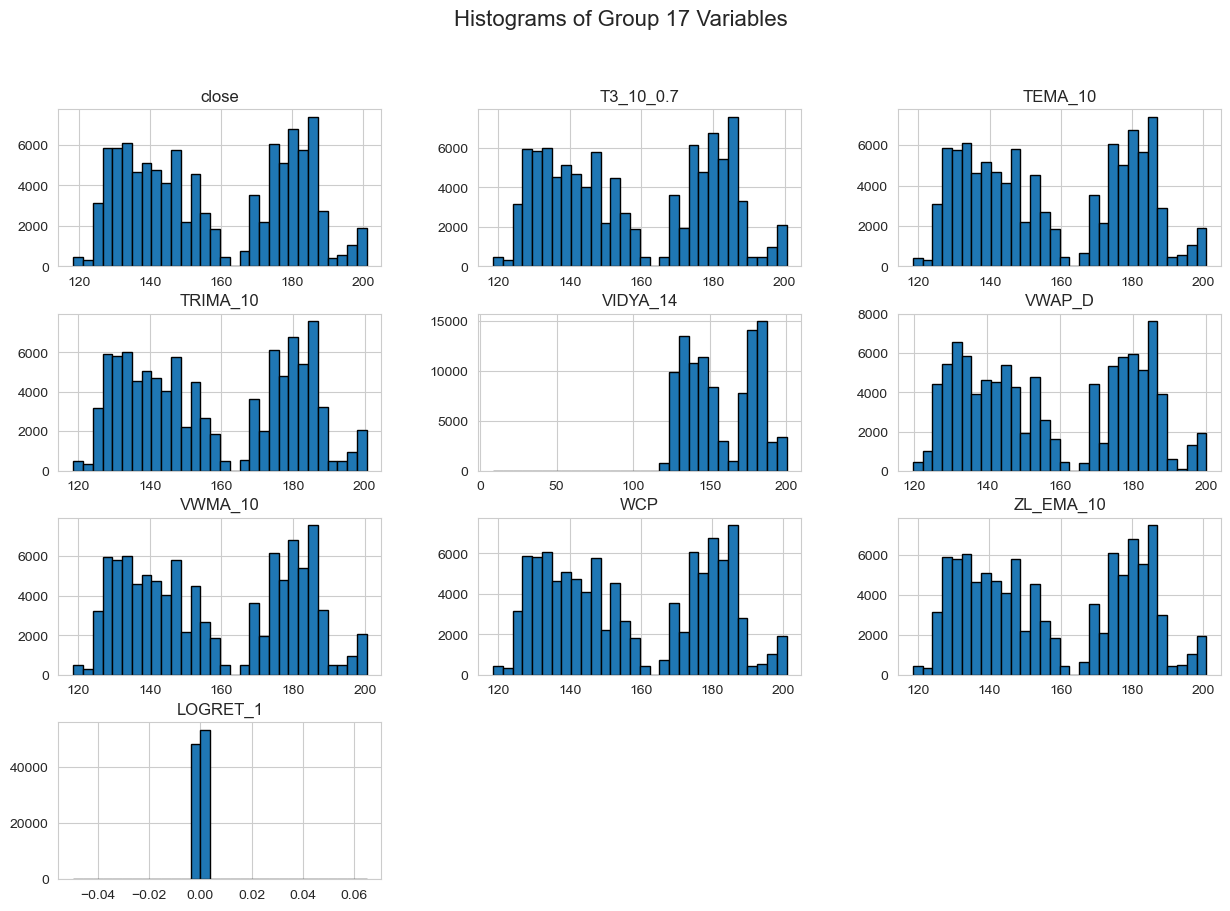

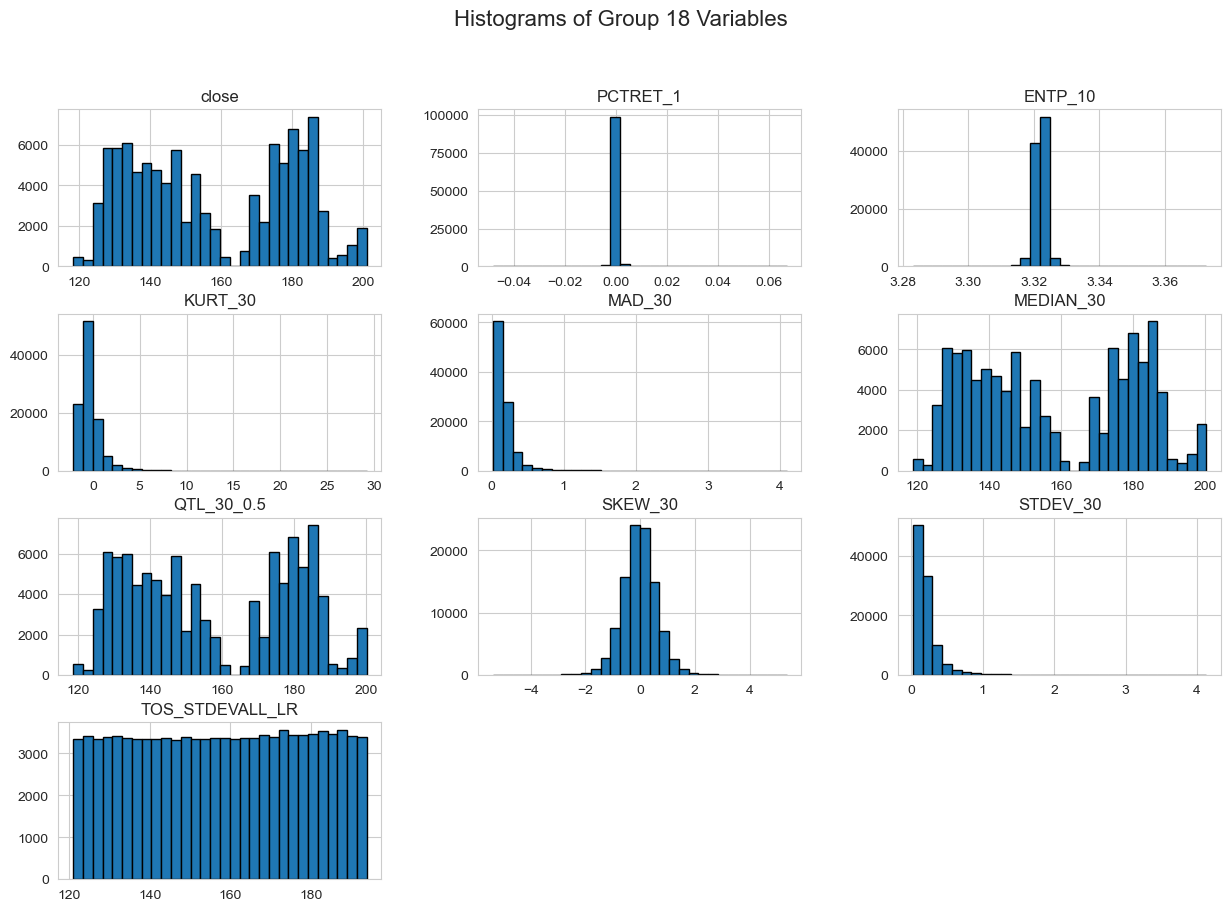

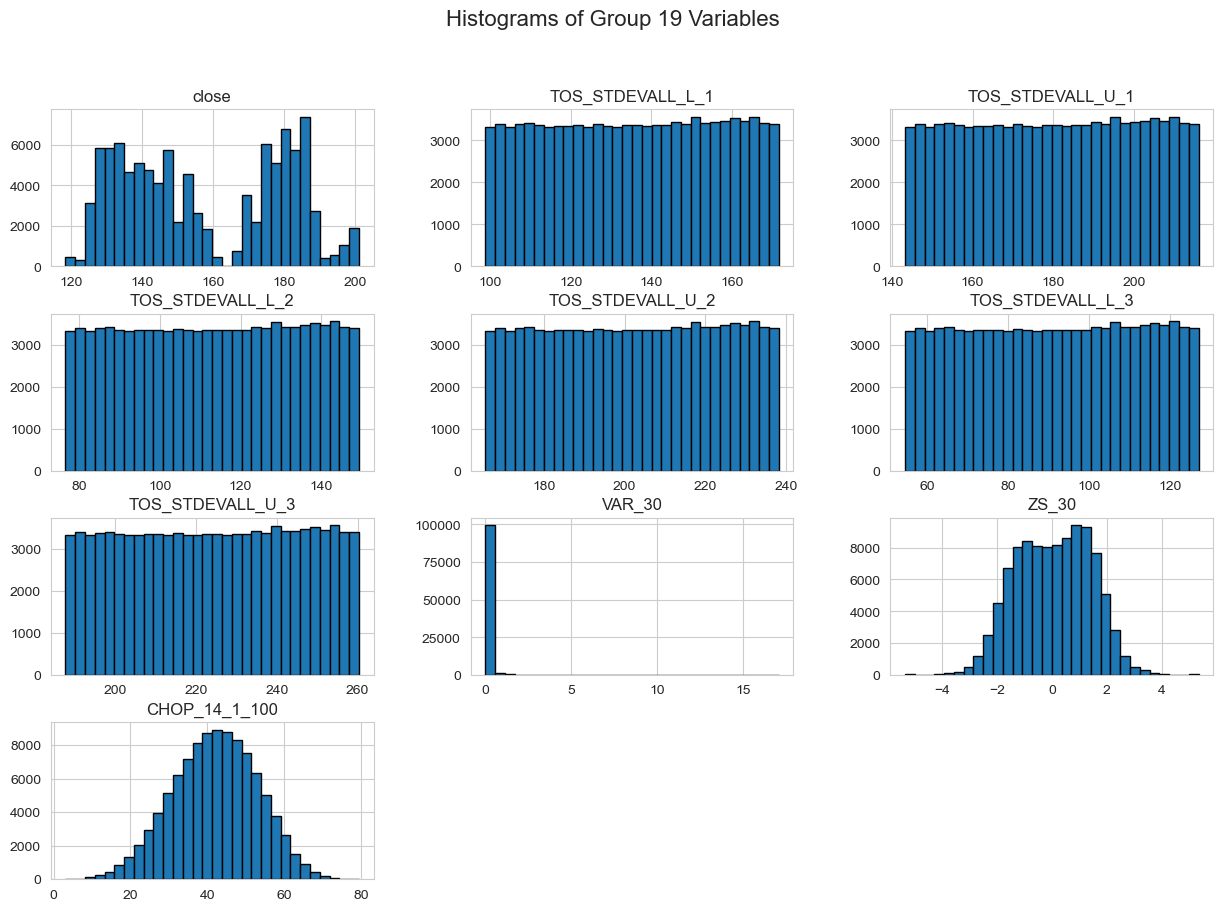

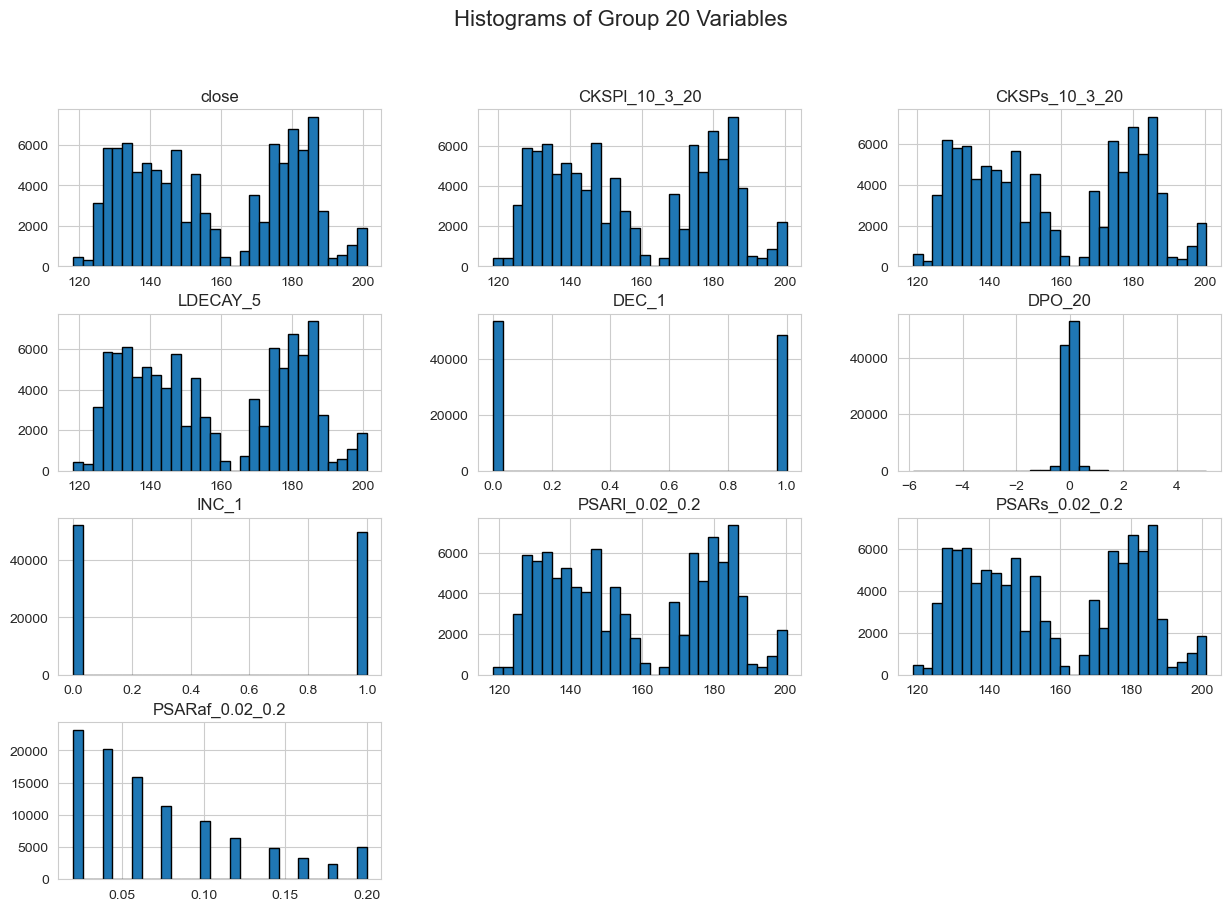

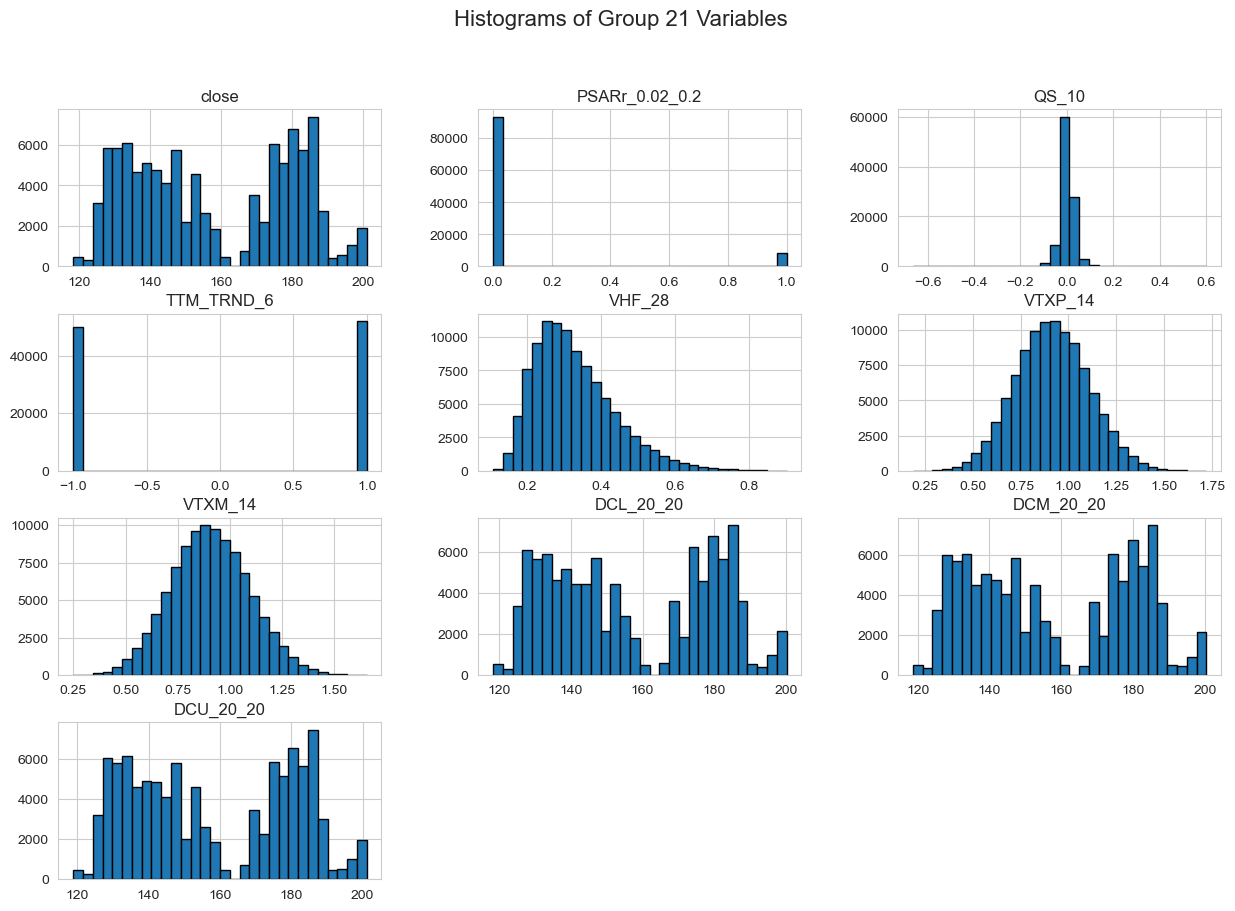

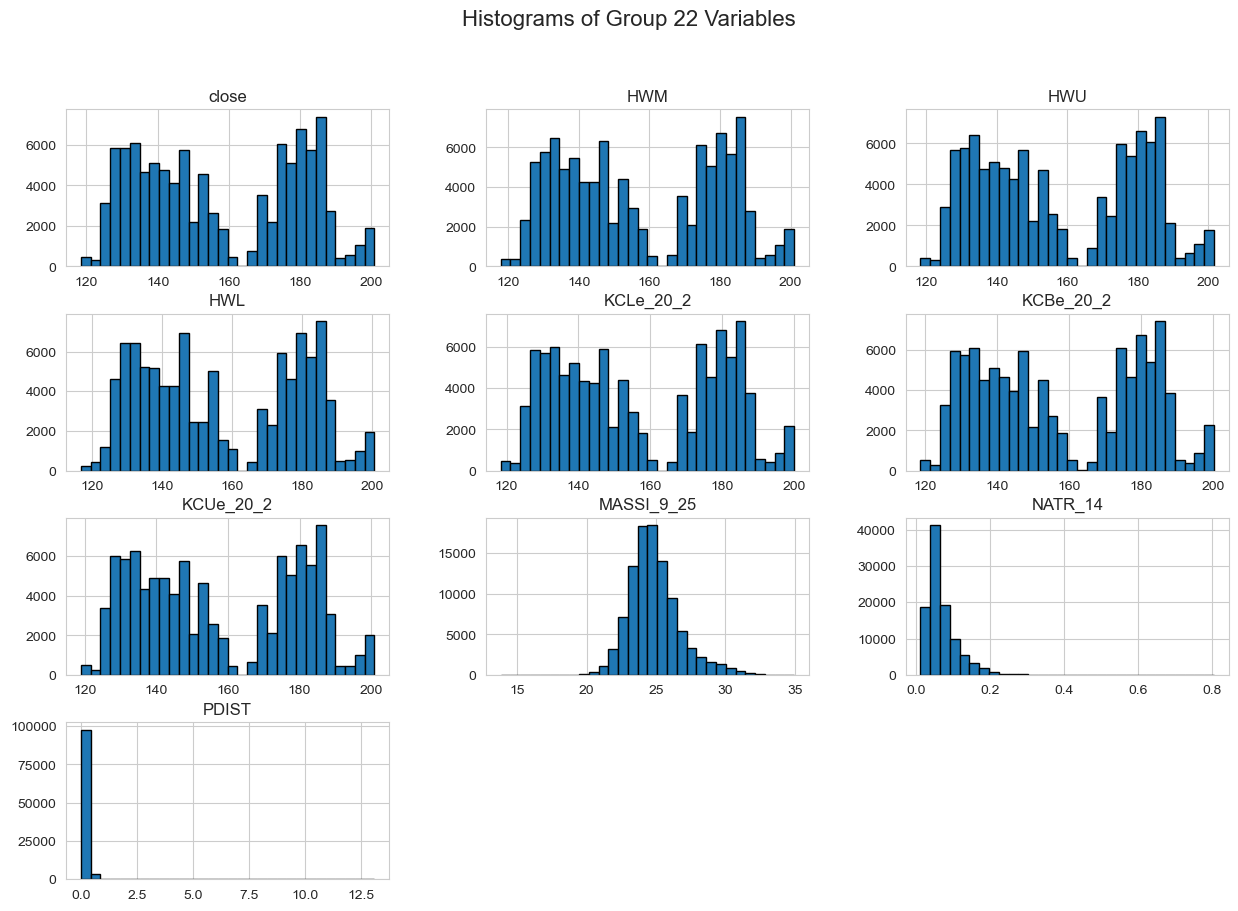

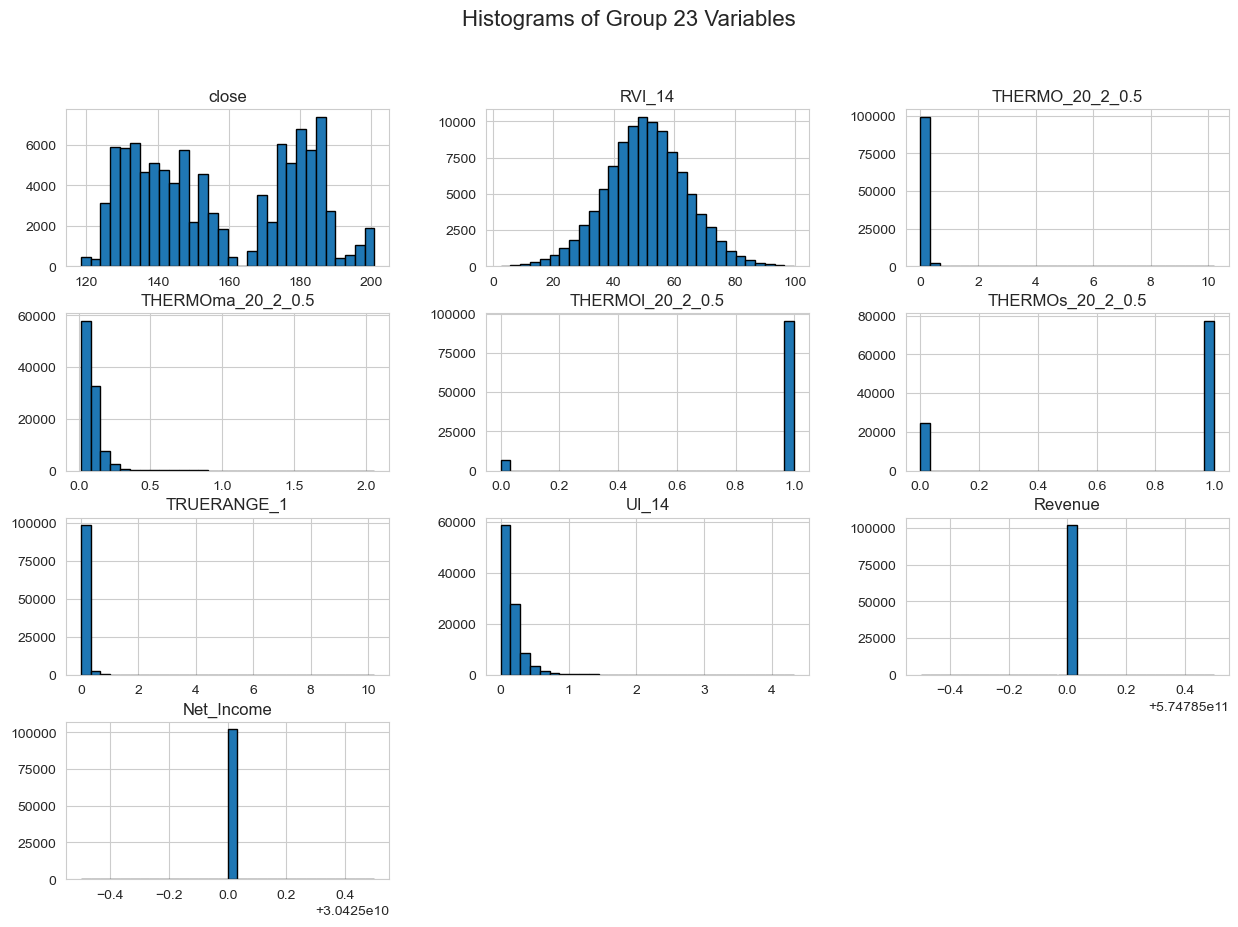

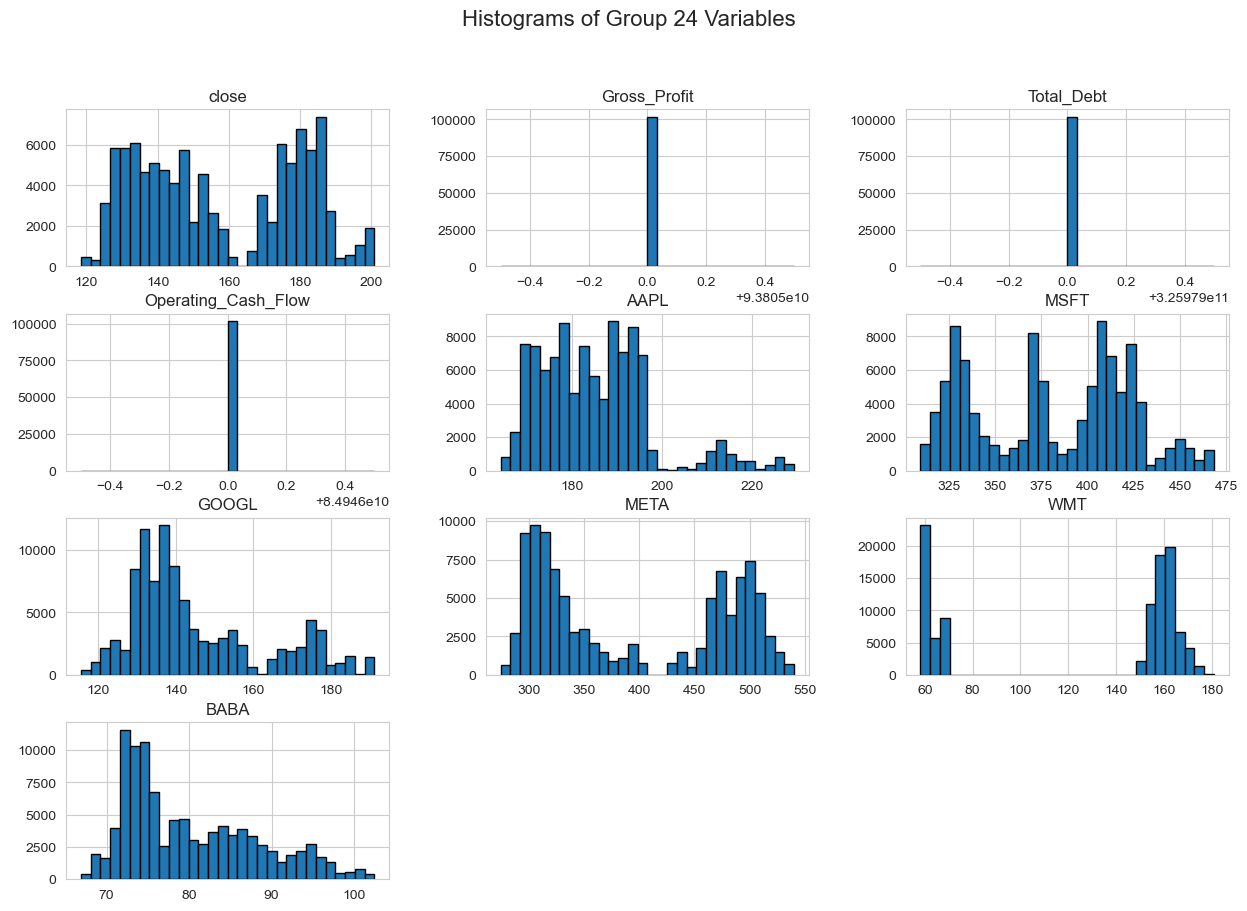

In [44]:

# Group 1
variables_group1 = df_new[['close', 'high', 'low', 'open', 'volume', 'vwap', 'SMA_10', 'SMA_2', 'SMA_5', 'SMA_7']]
variables_group1.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 1 Variables', fontsize=16)
plt.show()

# Group 2
variables_group2 = df_new[['close', 'SMA_14', 'SMA_30', 'SMA_50', 'SMA_200', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0']]
variables_group2.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 2 Variables', fontsize=16)
plt.show()

# Group 3
variables_group3 = df_new[['close', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ABER_ZG_5_15', 'ABER_SG_5_15', 'ABER_XG_5_15', 'ABER_ATR_5_15', 'ABER_ZG_5_15_A_BBL_20_2.0']]
variables_group3.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 3 Variables', fontsize=16)
plt.show()

# Group 4
variables_group4 = df_new[['close', 'ACCBL_20', 'ACCBM_20', 'ACCBU_20', 'AD', 'ADOSC_3_10', 'ADX_14', 'DMP_14', 'DMN_14', 'ALMA_10_6.0_0.85']]
variables_group4.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 4 Variables', fontsize=16)
plt.show()

# Group 5
variables_group5 = df_new[['close', 'AMATe_LR_8_21_2', 'AMATe_SR_8_21_2', 'AO_5_34', 'OBV', 'OBV_min_2', 'OBV_max_2', 'OBVe_4', 'OBVe_12', 'AOBV_LR_2']]
variables_group5.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 5 Variables', fontsize=16)
plt.show()

# Group 6
variables_group6 = df_new[['close', 'AOBV_SR_2', 'APO_12_26', 'AROOND_14', 'AROONU_14', 'AROONOSC_14', 'ATRr_14', 'ABER_ZG_5_15_B_BBL_20_2.0', 'BIAS_SMA_26', 'BOP']]
variables_group6.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 6 Variables', fontsize=16)
plt.show()

# Group 7
variables_group7 = df_new[['close', 'AR_26', 'BR_26', 'CCI_14_0.015', 'CFO_9', 'CG_10', 'CMO_14', 'COPC_11_14_10', 'CTI_12', 'ER_10']]
variables_group7.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 7 Variables', fontsize=16)
plt.show()

# Group 8
variables_group8 = df_new[['close', 'BULLP_13', 'BEARP_13', 'FISHERT_9_1', 'FISHERTs_9_1', 'INERTIA_20_14', 'K_9_3', 'D_9_3', 'J_9_3', 'KST_10_15_20_30_10_10_10_15']]
variables_group8.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 8 Variables', fontsize=16)
plt.show()

# Group 9
variables_group9 = df_new[['close', 'KSTs_9', 'MOM_10', 'PGO_14', 'PPO_12_26_9', 'PPOh_12_26_9', 'PPOs_12_26_9', 'PSL_12', 'PVO_12_26_9', 'PVOh_12_26_9']]
variables_group9.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 9 Variables', fontsize=16)
plt.show()

# Group 10
variables_group10 = df_new[['close', 'PVOs_12_26_9', 'QQE_14_5_4.236', 'QQE_14_5_4.236_RSIMA', 'QQEl_14_5_4.236', 'QQEs_14_5_4.236', 'ROC_10', 'RSX_14', 'RVGI_14_4', 'RVGIs_14_4']]
variables_group10.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 10 Variables', fontsize=16)
plt.show()

# Group 11
variables_group11 = df_new[['close', 'SLOPE_1', 'SMI_5_20_5', 'SMIs_5_20_5', 'SMIo_5_20_5', 'SQZ_20_2.0_20_1.5', 'SQZ_ON', 'SQZ_OFF', 'SQZ_NO', 'SQZPRO_20_2.0_20_2_1.5_1']]
variables_group11.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 11 Variables', fontsize=16)
plt.show()

# Group 12
variables_group12 = df_new[['close', 'SQZPRO_ON_WIDE', 'SQZPRO_ON_NORMAL', 'SQZPRO_ON_NARROW', 'SQZPRO_OFF', 'SQZPRO_NO', 'STC_10_12_26_0.5', 'STCmacd_10_12_26_0.5', 'STCstoch_10_12_26_0.5', 'STOCHRSIk_14_14_3_3']]
variables_group12.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 12 Variables', fontsize=16)
plt.show()

# Group 13
variables_group13 = df_new[['close', 'STOCHRSId_14_14_3_3', 'TRIX_30_9', 'TRIXs_30_9', 'TSI_13_25_13', 'TSIs_13_25_13', 'UO_7_14_28', 'WILLR_14']]
variables_group13.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 13 Variables', fontsize=16)
plt.show()

# Group 14
variables_group14 = df_new[['close', 'DEMA_10', 'EMA_10', 'FWMA_10', 'HILO_13_21', 'HILOl_13_21', 'HILOs_13_21', 'HL2', 'HLC3', 'HMA_10']]
variables_group14.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 14 Variables', fontsize=16)
plt.show()

# Group 15
variables_group15 = df_new[['close', 'HWMA_0.2_0.1_0.1', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'JMA_7_0', 'KAMA_10_2_30', 'LR_14']]
variables_group15.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 15 Variables', fontsize=16)
plt.show()

# Group 16
variables_group16 = df_new[['close', 'MIDPOINT_2', 'OHLC4', 'PWMA_10', 'SINWMA_14', 'SSF_10_2', 'SUPERT_7_3.0', 'SUPERTd_7_3.0', 'SUPERTl_7_3.0', 'SUPERTs_7_3.0']]
variables_group16.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 16 Variables', fontsize=16)
plt.show()

# Group 17
variables_group17 = df_new[['close', 'T3_10_0.7', 'TEMA_10', 'TRIMA_10', 'VIDYA_14', 'VWAP_D', 'VWMA_10', 'WCP', 'ZL_EMA_10', 'LOGRET_1']]
variables_group17.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 17 Variables', fontsize=16)
plt.show()

# Group 18
variables_group18 = df_new[['close', 'PCTRET_1', 'ENTP_10', 'KURT_30', 'MAD_30', 'MEDIAN_30', 'QTL_30_0.5', 'SKEW_30', 'STDEV_30', 'TOS_STDEVALL_LR']]
variables_group18.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 18 Variables', fontsize=16)
plt.show()

# Group 19
variables_group19 = df_new[['close', 'TOS_STDEVALL_L_1', 'TOS_STDEVALL_U_1', 'TOS_STDEVALL_L_2', 'TOS_STDEVALL_U_2', 'TOS_STDEVALL_L_3', 'TOS_STDEVALL_U_3', 'VAR_30', 'ZS_30', 'CHOP_14_1_100']]
variables_group19.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 19 Variables', fontsize=16)
plt.show()

# Group 20
variables_group20 = df_new[['close', 'CKSPl_10_3_20', 'CKSPs_10_3_20', 'LDECAY_5', 'DEC_1', 'DPO_20', 'INC_1', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'PSARaf_0.02_0.2']]
variables_group20.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 20 Variables', fontsize=16)
plt.show()

# Group 21
variables_group21 = df_new[['close', 'PSARr_0.02_0.2', 'QS_10', 'TTM_TRND_6', 'VHF_28', 'VTXP_14', 'VTXM_14', 'DCL_20_20', 'DCM_20_20', 'DCU_20_20']]
variables_group21.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 21 Variables', fontsize=16)
plt.show()

# Group 22
variables_group22 = df_new[['close', 'HWM', 'HWU', 'HWL', 'KCLe_20_2', 'KCBe_20_2', 'KCUe_20_2', 'MASSI_9_25', 'NATR_14', 'PDIST']]
variables_group22.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 22 Variables', fontsize=16)
plt.show()

# Group 23
variables_group23 = df_new[['close', 'RVI_14', 'THERMO_20_2_0.5', 'THERMOma_20_2_0.5', 'THERMOl_20_2_0.5', 'THERMOs_20_2_0.5', 'TRUERANGE_1', 'UI_14', 'Revenue', 'Net_Income']]
variables_group23.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 23 Variables', fontsize=16)
plt.show()

# Group 24
variables_group24 = df_new[['close', 'Gross_Profit', 'Total_Debt', 'Operating_Cash_Flow', 'AAPL', 'MSFT', 'GOOGL', 'META', 'WMT', 'BABA']]
variables_group24.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Group 24 Variables', fontsize=16)
plt.show()

In [ ]:
From the distributions it is fairly easy to see that many of the moving average variables and other technical indicators follow a similar distribution to the closing price. It is important to see which of these has the most impact on AMZN.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns

# Standardize the Data
features = df_new.drop(columns=['close'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform Hierarchical Clustering
distance_matrix = pdist(scaled_features, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')
threshold = 0.7 * np.max(linkage_matrix[:, 2])  # 70% of the max distance
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Apply t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

# Create a DataFrame with the t-SNE results and cluster labels
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters

# Plot the Clusters Using a Scatter Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Scatter Plot of Feature Clusters')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()




---------------------
As we can see in the plots above:

        -- when 10% of the variance is traded off, we will be left with only 20 features.
        -- when 5% of the variance is traded off, we will be left with only 34 features.
        -- when 1% of the variance is traded off, we will be left with only 60 features.

Now to check what these components are and see what the overlap is.